# Proyecto final: Asignatura Visión por Computador

## Aplicación de técnicas de visión por computador para el entrenamiento de un modelo de reconocimiento de patrones

Integrantes y documentos:

*   Diego Eusse Naranjo - 1037655233
*   Juan Mauricio Herrera Durán - 1128453482
*   Rafael Arturo Matallana Lozano - 1017248867
*   Juan David Ramírez Sánchez - 1128430332

## **1. Metodología a implementar**

<p align = "justify"> Para el desarrollo del presente ejercicio, se seguirá el siguiente orden: </p>

- Origen y descripción del dataset

- Modelamiento de Datos

- Preprocesamiento de imágenes

- Segmentación de imágenes

- Extracción de características

- Reconocimiento de patrones

- Análisis de resultados

- Presentación de Conclusiones

## **2. Origen y descipción del dataset**

Se realiza un estudio inicial sobre las características estadísticas del dataset, su origen, cantidad de imágenes, tamaño de las imágenes, usos del dataset,  lo que permite conocer al dataset de una manera más clara.

Para la realización de este proyecto, cada uno de los miembros realizó una búsqueda inicial de datasets de imágenes para reconocimiento de patrones dentro de los repositorios recomendados por el profesor, con un énfasis especial en la plataforma Kaggle (https://www.kaggle.com/datasets) y cada uno seleccionó un conjunto de ellos que fuese de gusto o interés personal.

Posteriormente se realizó una elección entre todos los miembros del grupo y se escogió el dataset denominado 'Rock-Paper-Scissors Images: Images from the Rock-Paper-Scissors game', una colección de imágenes del clásico juego de piedra-papel-tijera. Este dataset fue desarollado por drgfreeman, a quien damos crédito, Ingeniero aeroespacial quien trabaja en el área de Data Science, por lo cual se tomó el trabajo de realizar esta colección de diferentes imágenes en un ambiente controlado, buscando generar imágenes más semejantes. Su perfil puede visualizarse en: https://www.kaggle.com/drgfreeman

Se trata de una colección de 2188 imágenes de las diferentes alternativas del juego: Piedra, Papel y Tijera. Este dataset fue posteado alrededor de hace 3 años, por lo que se asume que pertenece a mediados del año 2018 o principios del 2019.

A continuación se muestran algunas especificaciones y características del dataset escogido:

### **Link del dataset original**

https://www.kaggle.com/drgfreeman/rockpaperscissors

### **Algunas características generales**

* Este dataset contiene imágenes de las diferentes alternativas del juego, en 3 clases diferentes:  Piedra, Papel, Tijera.

* El formato de las imágenes es '.png' para la totalidad de las imágenes, esto se verificará a continuación.

* El dataset cuenta con imágenes de un ancho máximo de 300 px * alto máximo de 200 px, esto también se verificará a continuación, primero, de manera global sobre todo el conjunto de imágenes y luego, de manera local para cada clase: Piedra, Papel, Tijera.

* El dataset es ideal para trabajar y entrenar modelos de clasificación, detección y segmentación de objetos en imágenes.

### **Importamos librerías necesarias**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import pandas as pd
import numpy as np 
import imutils
import cv2
import os
import glob
import random
import matplotlib.pyplot as plt
import os
import zipfile
import math
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Clases en el dataset

In [3]:
ls RPS

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\RockPaperScissorsClassifier\RPS

29/12/2021  11:04 a.ÿm.    <DIR>          .
29/12/2021  11:04 a.ÿm.    <DIR>          ..
28/12/2021  10:49 p.ÿm.    <DIR>          paper
17/10/2019  10:19 p.ÿm.               879 README_rpc-cv-images.txt
28/12/2021  10:49 p.ÿm.    <DIR>          rock
28/12/2021  10:49 p.ÿm.    <DIR>          scissors
               1 File(s)            879 bytes
               5 Dir(s)  60.410.040.320 bytes free


Se observa que el dataset cuenta con 3 clases: Paper, Rock y Scissors. 

### Creación de directorios

In [4]:
# Creamos rutas para los datos
# Ruta general
base_dir = 'RPS'

# Sub rutas
Rock = base_dir + '/rock'
Paper = base_dir + '/paper'
Scissors = base_dir + '/scissors'

directories = [Rock, Paper, Scissors]

### Cantidad de imágenes

In [5]:
total = 0
for directory in directories:
    list = os.listdir(directory)
    number_files = len(list)
    total += number_files
    print('La carpeta ' + directory + ' tiene un total de ' + repr(number_files) + ' imágenes.')
print('Con lo que se tiene un total de ' + repr(total) + ' imágenes.')

La carpeta RPS/rock tiene un total de 726 imágenes.
La carpeta RPS/paper tiene un total de 712 imágenes.
La carpeta RPS/scissors tiene un total de 750 imágenes.
Con lo que se tiene un total de 2188 imágenes.


Se observa que es un dataset bastante balanceado en cuanto a la cantidad de imágenes para cada clase.

### **Formato de las imágenes**

In [6]:
formatos = []
for directorio in directories:
    for image in os.listdir(directorio):
        formato = Image.open(directorio + '/' + image).format
        formatos.append(formato)

formatos = set(formatos)
print(formatos)

{'PNG'}


Se observa que el dataset contiene imágenes en formato .png en su totalidad.

### Tamaño de las imágenes (análisis global)

In [8]:
max_width = 0
max_height = 0
max_width_file = ''
max_height_file = ''
max_width_folder = ''
max_height_folder = ''

for directorio in directories:
    for image in os.listdir(directorio):
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            max_width_folder = directorio
            
        if height > max_height:
            max_height = height
            max_height_file = image
            max_height_folder = directorio
        
print('Las dimensiones máximas encontradas son: ' + repr(max_width) + ' pixeles de ancho y ' + repr(max_height) + ' pixeles de alto.')
print('Los archivos con estas dimensiones máximas son: ' + max_width_folder + '/' + max_width_file + ' (Ancho) y ' + max_height_folder + '/' + max_height_file + ' (Alto).')

Las dimensiones máximas encontradas son: 300 pixeles de ancho y 200 pixeles de alto.
Los archivos con estas dimensiones máximas son: RPS/rock/00nKV8oHuTGi20gq.png (Ancho) y RPS/rock/00nKV8oHuTGi20gq.png (Alto).


Se comprueba lo dicho en la descripción del dataset: Las dimensiones máximas son 300 pixeles de ancho y 200 pixeles de alto.

### Tamaño de las imágenes (por clase)

In [9]:
for directorio in directories:
    max_width = 0
    max_height = 0
    max_width_file = ''
    max_height_file = ''
    for image in os.listdir(directorio):
        
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            
        if height > max_height:
            max_height = height
            max_height_file = image
    print('Directorio: ' + directorio)
    print('Dimensiones máximas: ' + repr(max_width) + ' (Ancho), ' + repr(max_height) + ' (Alto).')
    print('Archivos con dimensiones máximas: ' + max_width_file + ' (Ancho) y ' + max_height_file + ' (Alto).')
    print('\n')

Directorio: RPS/rock
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 00nKV8oHuTGi20gq.png (Ancho) y 00nKV8oHuTGi20gq.png (Alto).


Directorio: RPS/paper
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 04l5I8TqdzF9WDMJ.png (Ancho) y 04l5I8TqdzF9WDMJ.png (Alto).


Directorio: RPS/scissors
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 0657zSfiTYzP2jrl.png (Ancho) y 0657zSfiTYzP2jrl.png (Alto).




## **3. Modelamiento de datos**

Una vez se tiene un conocimiento general de las características del dataset, se procede a realizar un modelamiento de datos. En esta sección se busca organizar y dividir al conjunto de datos entre conjuntos de entrenamiento (train), validación(val) y testeo(test), para posteriormente utilizarlos en la implementación del modelo. Se trabajará con un 70% de las imágenes para entrenamiento, un 20% para validación y un 10% para testeo del modelo final. Esta división puede realizarse por medio de las librerías de keras-tensorflow o también mediante la librería split-folders:

### **Utilizando Keras-Tensorflow:**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

Creación del conjunto de entrenamiento:

In [10]:
image_size = (256, 256)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.3,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 1532 files for training.


Creación del conjunto de validación:

In [11]:
validation = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


Creación del conjunto de testeo final:

In [12]:
test = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.1,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 218 files for validation.


Función para mostrar algunas imágenes de cierto dataset:

In [13]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

Mostrar algunas imágenes del conjunto de entrenamiento:

(256, 256, 3)


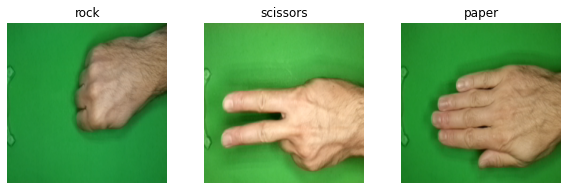

In [20]:
display_samples(train, 3, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

Mostrar algunas imágenes del conjunto de validación:

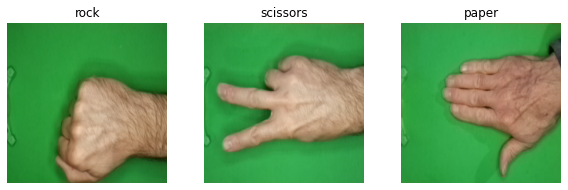

In [25]:
display_samples(validation, 3, validation.class_names)

Mostrar algunas imágenes del conjunto de testeo:

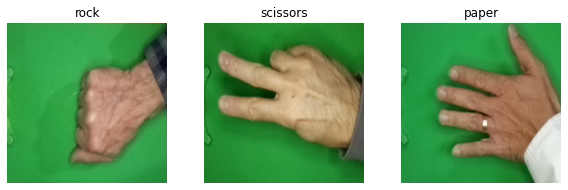

In [28]:
display_samples(test, 3, test.class_names)

### **Utilizando la librería split-folders:**

In [10]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


Se toman los conjuntos de imágenes para cada una de las alternativas del juego: Rock, Paper, Scissors y se genera un nuevo directorio 'ouput', donde se almacenarán 3 subdirectorios adicionales, correspondientes a los conjuntos de entrenamiento, validación y testeo, respectivamente. Se utiliza una división del 70% para entrenamiento, 20% para validación y 10% para testeo.

In [11]:
import splitfolders
splitfolders.ratio(base_dir, output="RPS/output", ratio=(0.7, 0.2, 0.1))

Copying files: 2188 files [00:13, 160.03 files/s]


Se verifica la creación de la carpeta 'output':

In [12]:
ls RPS\output

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\RockPaperScissorsClassifier\RPS\output

29/12/2021  11:09 a.ÿm.    <DIR>          .
29/12/2021  11:09 a.ÿm.    <DIR>          ..
29/12/2021  11:10 a.ÿm.    <DIR>          test
29/12/2021  11:10 a.ÿm.    <DIR>          train
29/12/2021  11:10 a.ÿm.    <DIR>          val
               0 File(s)              0 bytes
               5 Dir(s)  60.210.507.776 bytes free


### Funciones generales a utilizar en el procesamiento de imágenes:

In [16]:
def image_to_feature_vector(image, size=(128, 128)):
    # Convirtiendo imagen a un tamaño fijo y luego la aplanamos
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
  # Convertimos a HSV y obtenemos un histograma
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    # Normalizamos hist
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

### Generación de conjuntos de entrenamiento, validación y testeo con clases mezcladas, manteniendo las etiquetas de cada una de las imágenes:

Se actualizan rutas para los datos:

In [40]:
# Ruta general
base_dir = 'RPS/output/'

# Sub rutas
train_dir = base_dir + 'train/'
val_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

# Classes -> rock, paper, scissors

# Rutas entrenamiento por clases
train_rock_dir = train_dir + 'rock'
train_paper_dir = train_dir + 'paper'
train_scissors_dir = train_dir + 'scissors'

# Rutas validacion por clases
val_rock_dir = val_dir + 'rock'
val_paper_dir = val_dir + 'paper'
val_scissors_dir = val_dir + 'scissors'

# Rutas testeo por clases
test_rock_dir = test_dir + 'rock'
test_paper_dir = test_dir + 'paper'
test_scissors_dir = test_dir + 'scissors'

Se mezclan todos 'paths' de las diferentes clases para la creación de los datasets mezclados de entrenamiento, validación y testeo:

In [41]:
# Número de 'classes' en este caso vecinos para el algoritmo en como queremos agrupar
neighbors = 3
SEED = 42
root_dir = 'C:/Users/diego.eusse/Desktop/IA/2Semestre/VisionComputador/RockPaperScissorsClassifier/'

# Creamos un solo conjunto de datos entrenamiento combinando rutas de grapes y strawberries
# organizamos aleatoriamente # Classes -> rock, paper, scissors
data_rock = glob.glob(root_dir + train_rock_dir + '/*')
data_paper = glob.glob(root_dir + train_paper_dir + '/*')
data_scissors = glob.glob(root_dir + train_scissors_dir + '/*')
train_data_paths = data_rock + data_paper + data_scissors
random.shuffle(train_data_paths)

# Creamos un solo conjunto de datos de validación combinando rutas de grapes y strawberries
# organizamos aleatoriamente
val_rock = glob.glob(root_dir + val_rock_dir + '/*')
val_paper = glob.glob(root_dir + val_paper_dir + '/*')
val_scissors = glob.glob(root_dir + val_scissors_dir + '/*')
val_data_paths = val_rock + val_paper + val_scissors
random.shuffle(val_data_paths)

# Creamos un solo conjunto de datos testing combinando rutas de grapes y strawberries
# organizamos aleatoriamente
test_rock = glob.glob(root_dir + test_rock_dir + '/*')
test_paper = glob.glob(root_dir + test_paper_dir + '/*')
test_scissors = glob.glob(root_dir + test_scissors_dir + '/*')
test_data_paths = test_rock + test_paper + test_scissors
random.shuffle(test_data_paths)

In [42]:
print(f"Tamaño conjunto entrenamiento: {len(train_data_paths)}")
print(f"Tamaño conjunto de validación: {len(val_data_paths)}")
print(f"Tamaño conjunto testeo: {len(test_data_paths)}")
print(f"Tamaño total dataset: {len(train_data_paths) + len(val_data_paths) + len(test_data_paths)}")

Tamaño conjunto entrenamiento: 1531
Tamaño conjunto de validación: 437
Tamaño conjunto testeo: 220
Tamaño total dataset: 2188


Se genera un array con todas las imágenes de entrenamiento y otro con todos los labels de estas imágenes:

In [43]:
images = []
labels = []

for (i, imagePath) in enumerate(train_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
trainImages = np.array(images)
trainLabels = np.array(labels)

In [44]:
print("Len trainImages: ", len(trainImages))
print("Len trainLabels: ", len(trainLabels))

Len trainImages:  1531
Len trainLabels:  1531


De manera similar, se realiza con los conjuntos de validación y testeo:

In [45]:
images = []
labels = []

for (i, imagePath) in enumerate(val_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
validationImages = np.array(images)
validationLabels = np.array(labels)

In [46]:
print("Len validationImages: ", len(validationImages))
print("Len validationLabels: ", len(validationLabels))

Len validationImages:  437
Len validationLabels:  437


In [47]:
images = []
labels = []

for (i, imagePath) in enumerate(test_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
testImages = np.array(images)
testLabels = np.array(labels)

In [48]:
print("Len testImages: ", len(testImages))
print("Len testLabels: ", len(testLabels))

Len testImages:  220
Len testLabels:  220


## **4. Preprocesamiento de imágenes**


En esta sección se toman algunas de las imágenes y se intenta predecir el pre-procesamiento general que se debe aplicar a las imágenes del dataset antes de la construcción del modelo. En general, se planea realizar un reshape para que cada una de las imágenes tenga un mismo tamaño y posteriormente, se podría aplicar algunos filtros, con la intención de reducir el ruido en ellas.

Se comienza por tomar alguna de las imágenes del dataset de entrenamiento (trainImages), luego de realizar su respectivo reshape a un tamaño convencional (128, 128) y 3 canales de color:

In [49]:
trainImages.shape

(1531, 49152)

In [50]:
trainImages[0].shape

(49152,)

scissors


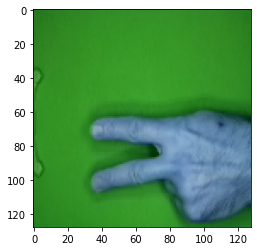

In [51]:
pic = np.reshape(trainImages[6], (128, 128, 3))
plt.imshow(pic, cmap="gray")
print(trainLabels[6])

Se intenta con un filtro de media:

Text(0.5, 1.0, 'Función Filter2D')

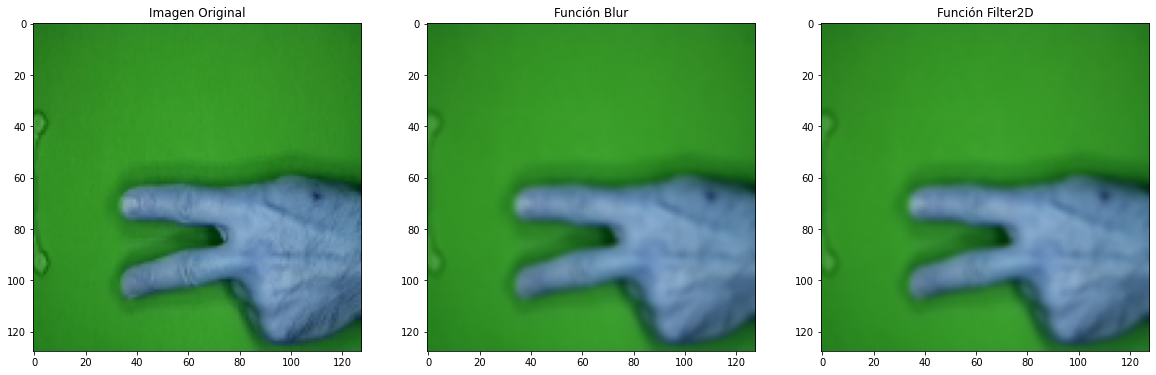

In [52]:
#Dar valor al tamaño del kernel
k_size = 3

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse
res1 = cv2.blur(pic,(k_size,k_size),borderType=cv2.BORDER_REPLICATE)

#Aplicar el suavizado mediante filter2D
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
res2 = cv2.filter2D(pic, ddepth= -1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Generar un subplot de 1x3 para mostrar imagen original, Blur y Filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,3,1)
plt.imshow(pic,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(res1,cmap='gray')
plt.title("Función Blur")

plt.subplot(1,3,3)
plt.imshow(res2,cmap='gray')
plt.title("Función Filter2D")

Ensayemos con el filtro de mediana:

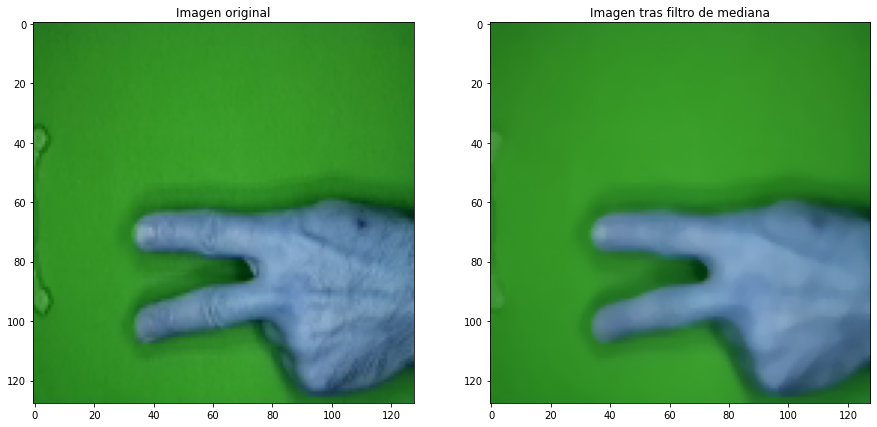

In [53]:
#Definir tamaño del kernel
k_size = 5
#Aplicar filtro de mediana a la imagen de entrada
medianBlurImg = cv2.medianBlur(pic, k_size)

#Generar un subplot 1x2 para mostrar imagen original e imagen tras filtro de mediana
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(pic, cmap="gray")

arreglo_plots[1].set_title('Imagen tras filtro de mediana')
arreglo_plots[1].imshow(medianBlurImg, cmap="gray")

Ensayamos finalmente con el filtro de máximo:

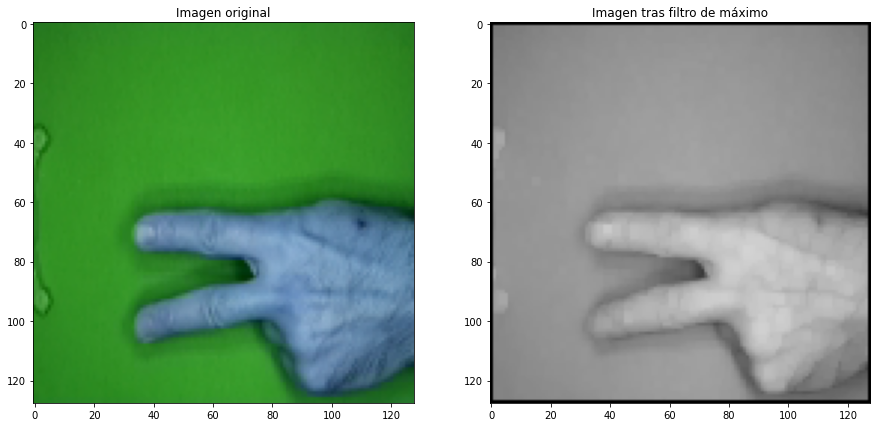

In [54]:
#Definir función de Filtro del Máximo
def maximum_filter(img,k_size):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            max_val = np.max(window)
            res[i,j] = max_val
    return res

#Leer imagen de entrada
img = pic

#Definir tamaño del kernel
k_size = 3 

#Aplicar filtro del Máximo a la imagen
res = maximum_filter(img, k_size)
#Recordar el tipo de dato uint8, entre 0 y 255
res = res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original e imagen tras filtro de máximo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de máximo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

Y con el filtro de mínimo:

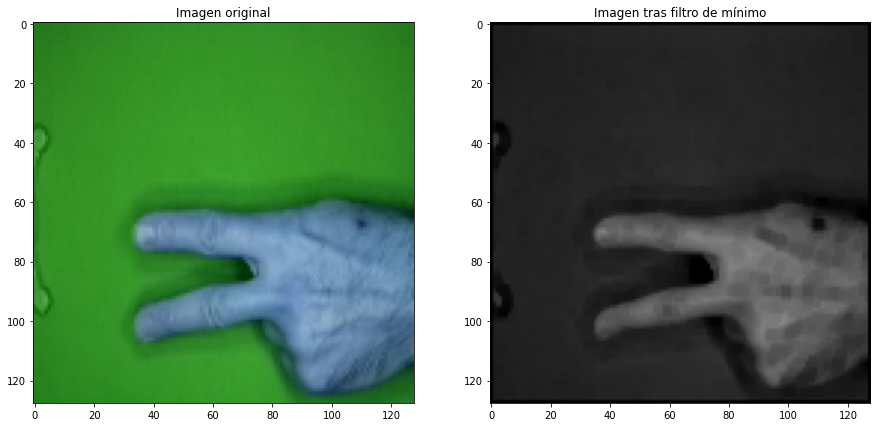

In [55]:
#Definir función filtro del mínimo
def minimum_filter(img,k_size):
    #Crear matriz de ceros del tamaño de imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Definir el radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            min_val = np.min(window)
            res[i,j] = min_val
    return res

#Leer la imagen de entrada
img = pic

#Definir el radio del kernel
k_size = 3

#Aplicar filtro del mínimo a la imagen de entrada
res = minimum_filter(img, k_size)

#Tipo de dato entero, entre 0 y 255
res = res.astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen original e imagen tras filtro del mínimo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de mínimo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

El filtro medianBlur retira relieves y detalles ruidosos de las manos (arrugas, vellos), conservando el contorno de las mismas. Se decide continuar con este filtro y con el reshape propuesto.

### **Cambio de espacio de color del espacio RGB al espacio HSV:**

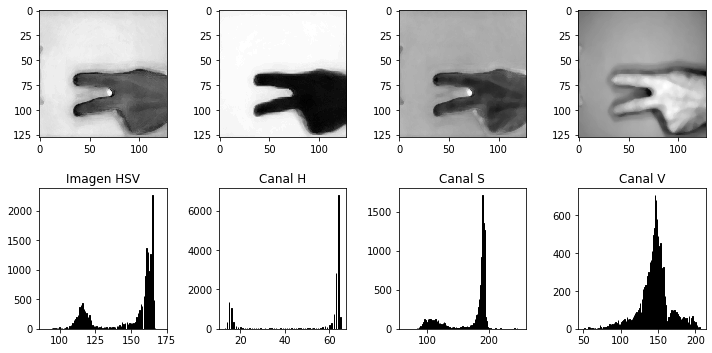

In [56]:
hsvImg = cv2.cvtColor(medianBlurImg, cv2.COLOR_BGR2HSV)

H = hsvImg[:,:,0]
S = hsvImg[:,:,1]
V = hsvImg[:,:,2]

idx = 1
fig1 = plt.figure(idx,figsize=(10, 10))
cols = 4

hsv_gray = cv2.cvtColor(hsvImg, cv2.COLOR_BGR2GRAY)

fig1.add_subplot(4, 4, 1)
plt.imshow(hsv_gray, cmap="gray")
fig1.add_subplot(4, 4, cols+1)
plt.hist(np.array(hsv_gray).ravel(), bins=256, fc='k', ec='k')
plt.title('Imagen HSV')

fig1.add_subplot(4, 4, 2)
plt.imshow(H, cmap='gray')
fig1.add_subplot(4, 4, cols+2)
plt.hist(np.array(H).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal H')

fig1.add_subplot(4, 4, 3)
plt.imshow(S, cmap = 'gray')
fig1.add_subplot(4, 4, cols+3)
plt.hist(np.array(S).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal S')

fig1.add_subplot(4, 4, 4)
plt.imshow(V, cmap = 'gray')
fig1.add_subplot(4, 4, cols+4)
plt.hist(np.array(V).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal V')

plt.tight_layout()

Se decide continuar con el canal H luego del preprocesamiento realizado. Se aplica este mismo preprocesamiento para todas las imágenes de los diferentes datasets: entrenamiento, validación y testeo:

In [57]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de entrenamiento
for image in trainImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
trainImages = np.array(images)

Tenemos finalmente un array de 1531 imágenes de entrenamiento, suavizadas mediante el filtro medianBlur y con un tamaño de 128 * 128 pixeles cada una, en el canal H del espacio HSV:

In [58]:
trainImages.shape

(1531, 128, 128)

### Validation dataset

In [59]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de validación
for image in validationImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
validationImages = np.array(images)

In [60]:
validationImages.shape

(437, 128, 128)

### Test dataset

In [61]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de testeo
for image in testImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
testImages = np.array(images)

In [62]:
testImages.shape

(220, 128, 128)

## **5. Segmentación de imágenes**


La colección de imágenes presenta distintos tipos de imágenes en ambientes diferentes, ambientes no controlados, por lo que las características de cada una de las imágenes será diferente. Ante este escenario, es difícil aplicar un único modelo de segmentación para todas las imágenes, sin embargo, se intentará a continuación:

Ensayemos primero con una de las imágenes del conjunto *trainImages*, para tratar de predecir una segmentación más generalizada a aplicar a todo el conjunto. En este caso, se utiliza una imagen aleatoria. Observemos la imagen aleatoria luego del reshape y el filtro Blur realizado en la sección 4:

In [63]:
# Generar número aleatorio de imagen dentro del conjunto trainImages:
from random import randint
image_number = randint(0, len(trainImages))
print('La imagen a probar es la imagen número: ' + repr(image_number))

La imagen a probar es la imagen número: 1456


In [64]:
trainImages[image_number].shape

(128, 128)

paper


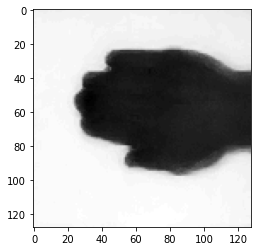

In [65]:
proof_image = trainImages[image_number]
plt.imshow(proof_image, cmap="gray")
print(trainLabels[image_number])

Se utiliza el método de segmentación OTSU, para encontrar el umbral de manera automática y lograr una segmentación óptima:

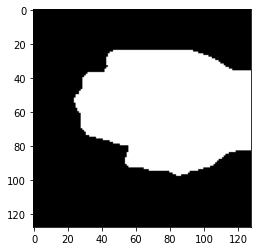

In [66]:
_, otsu = cv2.threshold(proof_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(otsu, cmap="gray")

Se observa que con este procedimiento, se logra una segmentación bastante adecuada para esta imagen. Se utilizará este procedimiento para todas las imágenes de los diferentes datasets: entrenamiento, validación y testeo:

In [67]:
images = []
# Llamar cada una de las imágenes del dataset de entrenamiento
for image in trainImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
trainImages = np.array(images)

Tenemos finalmente un array de 1531 imágenes de entrenamiento, suavizadas mediante el filtro medianBlur, con un tamaño de 128 * 128 pixeles cada una, segmentadas mediante OTSU, para el canal H del espacio HSV:

In [68]:
trainImages.shape

(1531, 128, 128)

### Validation dataset

In [69]:
images = []
# Llamar cada una de las imágenes del dataset de Validación
for image in validationImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
validationImages = np.array(images)

In [70]:
validationImages.shape

(437, 128, 128)

### Test dataset

In [73]:
images = []
# Llamar cada una de las imágenes del dataset de testeo
for image in testImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
testImages = np.array(images)

In [74]:
testImages.shape

(220, 128, 128)

## **6. Extracción de características**

Nos centraremos en el uso de descriptores de forma:

In [76]:
from skimage.measure import label, regionprops
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

### **Características de forma**

In [115]:
#función de características de forma

def get_features_area(props, features):
    features['y_centroid'], features['x_centroid'] = props.local_centroid
    features['perimeter'] = props.perimeter
    features['area'] = props.area
    features['area_to_convex_ratio'] = props.area/props.convex_area
    features['compacity'] = props.perimeter**2/props.area
    features['area2_perimeter'] = props.area**2/props.perimeter
    features['area2'] = props.area**2
    features['perimeter2'] = props.perimeter**2
    if (props.minor_axis_length == 0 or props.major_axis_length == 0):
        features['mayor_menor'] = np.nan
        features['menor_mayor'] = np.nan
    else:
        features['mayor_menor'] = props.major_axis_length/props.minor_axis_length
        features['menor_mayor'] = props.minor_axis_length/props.major_axis_length
    features['area_perimeter_ratio'] = props.area / props.perimeter
    features['extent'] = props.extent
    features['min_row'], features['min_col'], features['max_row'], features['max_col'] = props.bbox
    features['max_min_col'] = features['max_col'] - features['min_col']
    return features

### Uniendo lo anterior
Combinamos lo anterior en una sola función get_features: esta función devuelve un diccionario de features con las características extraidas de una imagen del conjunto de datos.

In [116]:
#función que extrae características de una imagen
def get_features(index, image_number):
    features = {}
    datasets = [trainImages, validationImages, testImages]
    img = datasets[index][image_number]
    label_img = label(img)
    props = regionprops(label_img)[0]
    features = get_features_area(props, features)
    
    contour = find_contours(img, 0)[0]   
    coords = approximate_polygon(contour, tolerance=2.5)
    features['polygon_count'] = len(coords)
    features['perimeter_polygonCount'] = features['perimeter']/features['polygon_count']
    
    return features

Se obtienen las características para el dataset de entrenamiento:

In [117]:
features_0 = get_features(0,0)
columns = [k  for  k in  features_0.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_train = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de entrenamiento 
for i in range(len(trainImages)):
    features = get_features(0,i)
    df_train.loc[i] = [features[feature] for feature in features.keys()]+[trainLabels[i]]

<ipython-input-115-6185763c36fb>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-115-6185763c36fb>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


Guardar todas las características de todas las imágenes del set de entrenamiento en un dataframe de Pandas:

In [118]:
#leer el set como un dataframe de pandas
df_train

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0      36.303182   63.909547  424.663997  5782              0.805517   
1      35.028404   63.470934  417.078210  5281              0.741297   
2       0.000000    0.000000    0.000000     1              1.000000   
3      37.425446   44.865365  331.622366  2971              0.669144   
4      39.272214   55.514810  391.237590  4963              0.795098   
...          ...         ...         ...   ...                   ...   
1526   31.076376   37.796015  273.338095  4216              0.914335   
1527   37.887526   50.513108  287.580736  4730              0.941294   
1528   36.985143   53.693477  325.137085  5856              0.936660   
1529   35.409403   50.433005  298.994949  5381              0.951043   
1530   66.882123   53.625548  565.529004  6388              0.723771   

      compacity  area2_perimeter     area2     perimeter2  mayor_menor  ...  \
0     31.189815     7.872465e+04  33431524  180339.510284     1.651904  ...   
1     32.939639     6.686746e+04  27888961  173954.233663     1.631941  ...   
2      0.000000              inf         1       0.000000          NaN  ...   
3     37.015616     2.661715e+04   8826841  109973.393873     1.298336  ...   
4     30.841598     6.295757e+04  24631369  153066.851871     1.285680  ...   
...         ...              ...       ...            ...          ...  ...   
1526  17.721469     6.502810e+04  17774656   74713.714242     1.466760  ...   
1527  17.484710     7.779694e+04  22372900   82702.679605     1.327710  ...   
1528  18.052275     1.054716e+05  34292736  105714.124036     1.278317  ...   
1529  16.613637     9.684164e+04  28955161   89397.979746     1.282764  ...   
1530  50.066226     7.215641e+04  40806544  319823.054338     1.181320  ...   

      area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                13.615470  0.691461       26      15     100     128   
1                12.661894  0.580202       12      17      94     128   
2                      inf  1.000000        0     107       1     108   
3                 8.958986  0.535895       28      56     105     128   
4                12.685386  0.703972       20      34      95     128   
...                    ...       ...      ...     ...     ...     ...   
1526             15.424122  0.722908       26      47      98     128   
1527             16.447555  0.740219       29      38     100     128   
1528             18.010865  0.756394       32      30     111     128   
1529             17.996960  0.771470       34      35     109     128   
1530             11.295619  0.556252       12      29     128     128   

     max_min_col polygon_count perimeter_polygonCount     class  
0            113            17              24.980235  scissors  
1            111            16              26.067388  scissors  
2              1             2               0.000000      rock  
3             72            13              25.509413  scissors  
4             94            15              26.082506  scissors  
...          ...           ...                    ...       ...  
1526          81            11              24.848918      rock  
1527          90            13              22.121595     paper  
1528          98            13              25.010545     paper  
1529          93            12              24.916246     paper  
1530          99            23              24.588218     paper  

[1531 rows x 21 columns]

Debido a algunas inconsistencias matemáticas en la generación de características, algunas de ellas toman valores tipo NaN. Se decide remover aquellos registros (imágenes) que contienen NaNs, para evitar problemas más adelante en el entrenamiento de los modelos predictivos:

In [119]:
df_train.dropna(inplace=True)
df_train

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0      36.303182   63.909547  424.663997  5782              0.805517   
1      35.028404   63.470934  417.078210  5281              0.741297   
3      37.425446   44.865365  331.622366  2971              0.669144   
4      39.272214   55.514810  391.237590  4963              0.795098   
6      28.872946   54.870248  364.994949  4077              0.777905   
...          ...         ...         ...   ...                   ...   
1526   31.076376   37.796015  273.338095  4216              0.914335   
1527   37.887526   50.513108  287.580736  4730              0.941294   
1528   36.985143   53.693477  325.137085  5856              0.936660   
1529   35.409403   50.433005  298.994949  5381              0.951043   
1530   66.882123   53.625548  565.529004  6388              0.723771   

      compacity  area2_perimeter     area2     perimeter2  mayor_menor  ...  \
0     31.189815     78724.648763  33431524  180339.510284     1.651904  ...   
1     32.939639     66867.461063  27888961  173954.233663     1.631941  ...   
3     37.015616     26617.146174   8826841  109973.393873     1.298336  ...   
4     30.841598     62957.572652  24631369  153066.851871     1.285680  ...   
6     32.676309     45540.161662  16621929  133221.313063     1.542620  ...   
...         ...              ...       ...            ...          ...  ...   
1526  17.721469     65028.096404  17774656   74713.714242     1.466760  ...   
1527  17.484710     77796.935659  22372900   82702.679605     1.327710  ...   
1528  18.052275    105471.622842  34292736  105714.124036     1.278317  ...   
1529  16.613637     96841.639169  28955161   89397.979746     1.282764  ...   
1530  50.066226     72156.412338  40806544  319823.054338     1.181320  ...   

      area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                13.615470  0.691461       26      15     100     128   
1                12.661894  0.580202       12      17      94     128   
3                 8.958986  0.535895       28      56     105     128   
4                12.685386  0.703972       20      34      95     128   
6                11.170018  0.664223       60      35     126     128   
...                    ...       ...      ...     ...     ...     ...   
1526             15.424122  0.722908       26      47      98     128   
1527             16.447555  0.740219       29      38     100     128   
1528             18.010865  0.756394       32      30     111     128   
1529             17.996960  0.771470       34      35     109     128   
1530             11.295619  0.556252       12      29     128     128   

     max_min_col polygon_count perimeter_polygonCount     class  
0            113            17              24.980235  scissors  
1            111            16              26.067388  scissors  
3             72            13              25.509413  scissors  
4             94            15              26.082506  scissors  
6             93            15              24.332997  scissors  
...          ...           ...                    ...       ...  
1526          81            11              24.848918      rock  
1527          90            13              22.121595     paper  
1528          98            13              25.010545     paper  
1529          93            12              24.916246     paper  
1530          99            23              24.588218     paper  

[1482 rows x 21 columns]

Se realiza la separación entre X_train y Y_train, con los datos de entrenamiento y los labels de entrenamiento, respectivamente:

In [120]:
X_train = df_train.loc[:, df_train.columns != 'class']
X_train.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   36.303182   63.909547  424.663997  5782              0.805517  31.189815   
1   35.028404   63.470934  417.078210  5281              0.741297  32.939639   
3   37.425446   44.865365  331.622366  2971              0.669144  37.015616   
4   39.272214   55.514810  391.237590  4963              0.795098  30.841598   
6   28.872946   54.870248  364.994949  4077              0.777905  32.676309   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0     78724.648763  33431524  180339.510284     1.651904     0.605362   
1     66867.461063  27888961  173954.233663     1.631941     0.612767   
3     26617.146174   8826841  109973.393873     1.298336     0.770216   
4     62957.572652  24631369  153066.851871     1.285680     0.777798   
6     45540.161662  16621929  133221.313063     1.542620     0.648248   

   area_perimeter_ratio    extent min_row min_col max_row max_col max_min_col  \
0             13.615470  0.691461      26      15     100     128         113   
1             12.661894  0.580202      12      17      94     128         111   
3              8.958986  0.535895      28      56     105     128          72   
4             12.685386  0.703972      20      34      95     128          94   
6             11.170018  0.664223      60      35     126     128          93   

  polygon_count  perimeter_polygonCount  
0            17               24.980235  
1            16               26.067388  
3            13               25.509413  
4            15               26.082506  
6            15               24.332997

In [121]:
Y_train = df_train[['class']]
Y_train.head()

class
0  scissors
1  scissors
3  scissors
4  scissors
6  scissors

Se replica este mismo procedimiento con los datasets de validación y testeo:

### Validation Dataset

In [122]:
features_1 = get_features(1,0)
columns = [k  for  k in  features_1.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_val = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de validación
for i in range(len(validationImages)):
    features = get_features(1, i)
    df_val.loc[i] = [features[feature] for feature in features.keys()]+[validationLabels[i]]

<ipython-input-115-6185763c36fb>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-115-6185763c36fb>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [123]:
df_val.dropna(inplace=True)
df_val

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0     37.353027   56.776827  384.894444  4790              0.802345   
1     41.307021   54.005822  310.994949  5840              0.954248   
2     33.171322   56.248409  365.415260  5656              0.896071   
4     39.647108   60.362303  374.793939  7226              0.904607   
5     38.778014   56.952540  339.172619  6595              0.946334   
..          ...         ...         ...   ...                   ...   
432   33.379996   56.135587  316.894444  5679              0.935893   
433   42.223060   34.971297  268.787843  4111              0.944840   
434   35.846458   71.426689  473.563492  6070              0.784745   
435   38.105166   37.697601  297.681241  5420              0.955066   
436   26.315815   55.983848  350.509668  4148              0.828440   

     compacity  area2_perimeter     area2     perimeter2  mayor_menor  ...  \
0    30.927710     59611.408633  22944100  148143.733255     1.354429  ...   
1    16.561277    109666.089657  34105600   96717.858531     1.253314  ...   
2    23.608259     87545.156260  31990336  133528.311936     1.614435  ...   
4    19.439593    139316.756578  52215076  140470.496891     1.434510  ...   
5    17.443224    128235.661067  43494025  115038.065409     1.375537  ...   
..         ...              ...       ...            ...          ...  ...   
432  17.683058    101772.188121  32251041  100422.088830     1.658191  ...   
433  17.574046     62876.061795  16900321   72246.904321     1.611027  ...   
434  36.946026     77803.506041  36844900  224262.380824     1.911194  ...   
435  16.349469     98684.082055  29376400   88614.121164     1.255935  ...   
436  29.618377     49088.243695  17205904  122857.027356     1.741448  ...   

     area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0               12.444970  0.702758       29      32     100     128   
1               18.778440  0.760417       26      32     106     128   
2               15.478281  0.698272       53      20     128     128   
4               19.279928  0.690492       32      13     123     128   
5               19.444376  0.777712       13      22      93     128   
..                    ...       ...      ...     ...     ...     ...   
432             17.920794  0.740610       40      20     111     128   
433             15.294591  0.706115        3      57      85     128   
434             12.817711  0.673173       39       1     110     128   
435             18.207395  0.836678       20      49     102     128   
436             11.834196  0.790547       75      29     128     128   

    max_min_col polygon_count perimeter_polygonCount     class  
0            96            17              22.640850  scissors  
1            96            12              25.916246     paper  
2           108            13              28.108866     paper  
4           115            17              22.046702     paper  
5           106            14              24.226616     paper  
..          ...           ...                    ...       ...  
432         108            14              22.635317     paper  
433          71            10              26.878784      rock  
434         127            23              20.589717  scissors  
435          79            12              24.806770      rock  
436          99            14              25.036405  scissors  

[420 rows x 21 columns]

Se realiza la separación entre X_val y Y_val, con los datos de validación y los labels de validación, respectivamente:

In [124]:
X_val = df_val.loc[:, df_val.columns != 'class']
X_val.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   37.353027   56.776827  384.894444  4790              0.802345  30.927710   
1   41.307021   54.005822  310.994949  5840              0.954248  16.561277   
2   33.171322   56.248409  365.415260  5656              0.896071  23.608259   
4   39.647108   60.362303  374.793939  7226              0.904607  19.439593   
5   38.778014   56.952540  339.172619  6595              0.946334  17.443224   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0     59611.408633  22944100  148143.733255     1.354429     0.738318   
1    109666.089657  34105600   96717.858531     1.253314     0.797885   
2     87545.156260  31990336  133528.311936     1.614435     0.619412   
4    139316.756578  52215076  140470.496891     1.434510     0.697102   
5    128235.661067  43494025  115038.065409     1.375537     0.726989   

   area_perimeter_ratio    extent min_row min_col max_row max_col max_min_col  \
0             12.444970  0.702758      29      32     100     128          96   
1             18.778440  0.760417      26      32     106     128          96   
2             15.478281  0.698272      53      20     128     128         108   
4             19.279928  0.690492      32      13     123     128         115   
5             19.444376  0.777712      13      22      93     128         106   

  polygon_count  perimeter_polygonCount  
0            17               22.640850  
1            12               25.916246  
2            13               28.108866  
4            17               22.046702  
5            14               24.226616

In [125]:
Y_val = df_val[['class']]
Y_val.head()

class
0  scissors
1     paper
2     paper
4     paper
5     paper

### Test Dataset

In [126]:
features_2 = get_features(2, 0)
columns = [k  for  k in  features_2.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_test = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de entrenamiento 
for i in range(len(testImages)):
    features = get_features(2, i)
    df_test.loc[i] = [features[feature] for feature in features.keys()]+[testLabels[i]]

<ipython-input-115-6185763c36fb>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-115-6185763c36fb>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [127]:
df_test

y_centroid  x_centroid   perimeter   area  area_to_convex_ratio  \
0     36.105104   55.238278  326.651804   6270              0.953612   
1     40.053489   61.319402  409.841666   5216              0.725553   
2     42.709684   42.565415  294.586832   5060              0.917498   
3     40.902981   58.342344  417.764502   5401              0.730260   
4     46.478417   47.570124  340.752309   5583              0.911808   
..          ...         ...         ...    ...                   ...   
215   16.283582    0.477612   66.000000     67              0.985294   
216   36.698851   60.510972  393.072114   4785              0.760731   
217   66.123410   57.188518  561.367532  14545              0.891620   
218   36.201857   64.891205  412.350288   5276              0.808211   
219   41.415069   46.520514  301.137085   5216              0.916374   

     compacity  area2_perimeter      area2     perimeter2  mayor_menor  ...  \
0    17.017767    120351.088115   39312900  106701.400805     1.327812  ...   
1    32.202874     66383.333436   27206656  167970.191562     1.542727  ...   
2    17.150475     86913.592798   25603600   86781.401858     1.270734  ...   
3    32.313864     69825.944668   29170801  174527.179121     1.271668  ...   
4    20.797445     91473.742675   31169889  116112.135870     1.115827  ...   
..         ...              ...        ...            ...          ...  ...   
215  65.014925        68.015152       4489    4356.000000    19.526412  ...   
216  32.289590     58249.425981   22896225  154505.686673     1.612410  ...   
217  21.666106    376860.101096  211557025  315133.506397     1.167095  ...   
218  32.227589     67506.139274   27836176  170032.760365     1.752620  ...   
219  17.385649     90346.414826   27206656   90683.543956     1.312781  ...   

     area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0               19.194751  0.785813       24      27     103     128   
1               12.726866  0.655523       10      19      83     128   
2               17.176599  0.708683       29      44     114     128   
3               12.928336  0.632140       32      32     121     128   
4               16.384335  0.696221       16      47     115     128   
..                    ...       ...      ...     ...     ...     ...   
215              1.015152  0.957143        0       0      35       2   
216             12.173339  0.621752       35      24     109     128   
217             25.909942  0.887756        0       0     128     128   
218             12.794947  0.676671       31      15     100     128   
219             17.321015  0.691410       29      36     111     128   

    max_min_col polygon_count perimeter_polygonCount     class  
0           101            15              21.776787     paper  
1           109            17              24.108333  scissors  
2            84            10              29.458683      rock  
3            96            15              27.850967  scissors  
4            81            16              21.297019     paper  
..          ...           ...                    ...       ...  
215           2             2              33.000000     paper  
216         104            17              23.121889  scissors  
217         128             6              93.561255      rock  
218         113            16              25.771893  scissors  
219          92            11              27.376099      rock  

[220 rows x 21 columns]

In [128]:
df_test.dropna(inplace=True)
df_test

y_centroid  x_centroid   perimeter   area  area_to_convex_ratio  \
0     36.105104   55.238278  326.651804   6270              0.953612   
1     40.053489   61.319402  409.841666   5216              0.725553   
2     42.709684   42.565415  294.586832   5060              0.917498   
3     40.902981   58.342344  417.764502   5401              0.730260   
4     46.478417   47.570124  340.752309   5583              0.911808   
..          ...         ...         ...    ...                   ...   
215   16.283582    0.477612   66.000000     67              0.985294   
216   36.698851   60.510972  393.072114   4785              0.760731   
217   66.123410   57.188518  561.367532  14545              0.891620   
218   36.201857   64.891205  412.350288   5276              0.808211   
219   41.415069   46.520514  301.137085   5216              0.916374   

     compacity  area2_perimeter      area2     perimeter2  mayor_menor  ...  \
0    17.017767    120351.088115   39312900  106701.400805     1.327812  ...   
1    32.202874     66383.333436   27206656  167970.191562     1.542727  ...   
2    17.150475     86913.592798   25603600   86781.401858     1.270734  ...   
3    32.313864     69825.944668   29170801  174527.179121     1.271668  ...   
4    20.797445     91473.742675   31169889  116112.135870     1.115827  ...   
..         ...              ...        ...            ...          ...  ...   
215  65.014925        68.015152       4489    4356.000000    19.526412  ...   
216  32.289590     58249.425981   22896225  154505.686673     1.612410  ...   
217  21.666106    376860.101096  211557025  315133.506397     1.167095  ...   
218  32.227589     67506.139274   27836176  170032.760365     1.752620  ...   
219  17.385649     90346.414826   27206656   90683.543956     1.312781  ...   

     area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0               19.194751  0.785813       24      27     103     128   
1               12.726866  0.655523       10      19      83     128   
2               17.176599  0.708683       29      44     114     128   
3               12.928336  0.632140       32      32     121     128   
4               16.384335  0.696221       16      47     115     128   
..                    ...       ...      ...     ...     ...     ...   
215              1.015152  0.957143        0       0      35       2   
216             12.173339  0.621752       35      24     109     128   
217             25.909942  0.887756        0       0     128     128   
218             12.794947  0.676671       31      15     100     128   
219             17.321015  0.691410       29      36     111     128   

    max_min_col polygon_count perimeter_polygonCount     class  
0           101            15              21.776787     paper  
1           109            17              24.108333  scissors  
2            84            10              29.458683      rock  
3            96            15              27.850967  scissors  
4            81            16              21.297019     paper  
..          ...           ...                    ...       ...  
215           2             2              33.000000     paper  
216         104            17              23.121889  scissors  
217         128             6              93.561255      rock  
218         113            16              25.771893  scissors  
219          92            11              27.376099      rock  

[212 rows x 21 columns]

Se realiza la separación entre X_test y Y_test, con los datos de testeo y los labels de testeo, respectivamente:

In [129]:
X_test = df_test.loc[:, df_test.columns != 'class']
X_test.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   36.105104   55.238278  326.651804  6270              0.953612  17.017767   
1   40.053489   61.319402  409.841666  5216              0.725553  32.202874   
2   42.709684   42.565415  294.586832  5060              0.917498  17.150475   
3   40.902981   58.342344  417.764502  5401              0.730260  32.313864   
4   46.478417   47.570124  340.752309  5583              0.911808  20.797445   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0    120351.088115  39312900  106701.400805     1.327812     0.753118   
1     66383.333436  27206656  167970.191562     1.542727     0.648203   
2     86913.592798  25603600   86781.401858     1.270734     0.786947   
3     69825.944668  29170801  174527.179121     1.271668     0.786369   
4     91473.742675  31169889  116112.135870     1.115827     0.896196   

   area_perimeter_ratio    extent min_row min_col max_row max_col max_min_col  \
0             19.194751  0.785813      24      27     103     128         101   
1             12.726866  0.655523      10      19      83     128         109   
2             17.176599  0.708683      29      44     114     128          84   
3             12.928336  0.632140      32      32     121     128          96   
4             16.384335  0.696221      16      47     115     128          81   

  polygon_count  perimeter_polygonCount  
0            15               21.776787  
1            17               24.108333  
2            10               29.458683  
3            15               27.850967  
4            16               21.297019

In [130]:
Y_test = df_test[['class']]
Y_test.head()

class
0     paper
1  scissors
2      rock
3  scissors
4     paper

## **7. Selección de características**
Inicialmente se realiza una estandarización para cada uno de los datasets de características:

In [131]:
features = (X_train.columns).tolist()
features

['y_centroid',
 'x_centroid',
 'perimeter',
 'area',
 'area_to_convex_ratio',
 'compacity',
 'area2_perimeter',
 'area2',
 'perimeter2',
 'mayor_menor',
 'menor_mayor',
 'area_perimeter_ratio',
 'extent',
 'min_row',
 'min_col',
 'max_row',
 'max_col',
 'max_min_col',
 'polygon_count',
 'perimeter_polygonCount']

Estandarización del dataset de características de entrenamiento:

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = features
X_train.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -0.384766    1.136976   1.023849  0.446648             -0.696190   
1   -0.550269    1.102568   0.929554  0.126299             -1.423443   
2   -0.239064   -0.357012  -0.132707 -1.350757             -2.240532   
3    0.000699    0.478421   0.608341 -0.077036             -0.814181   
4   -1.349424    0.427856   0.282132 -0.643560             -1.008878   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0   0.602838        -0.016459  0.269287    1.016575    -0.058886    -0.587222   
1   0.780211        -0.315184 -0.020869    0.902092    -0.067627    -0.530300   
2   1.193378        -1.329235 -1.018781   -0.245028    -0.213698     0.679986   
3   0.567540        -0.413688 -0.191405    0.527600    -0.219240     0.738267   
4   0.753518        -0.852496 -0.610704    0.171787    -0.106737    -0.257567   

   area_perimeter_ratio    extent   min_row   min_col   max_row   max_col  \
0             -0.295032 -0.048650  0.097018 -1.078497 -0.274331  0.164402   
1             -0.548789 -1.367510 -0.994593 -0.965309 -0.634650  0.164402   
2             -1.534175 -1.892728  0.252962  1.241865  0.025934  0.164402   
3             -0.542538  0.099646 -0.370815 -0.003208 -0.574597  0.164402   
4             -0.945794 -0.371533  2.748072  0.053386  1.287048  0.164402   

   max_min_col  polygon_count  perimeter_polygonCount  
0     1.025105       0.915065               -0.144020  
1     0.931618       0.648897               -0.032219  
2    -0.891372      -0.149607               -0.089601  
3     0.136981       0.382729               -0.030665  
4     0.090238       0.382729               -0.210581

Estandarización del dataset de características de validación:

In [133]:
scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)
X_val = pd.DataFrame(X_val)
X_val.columns = features
X_val.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -0.327468    0.507923   0.467111 -0.273214             -0.750632   
1    0.241448    0.285415  -0.464972  0.405803              0.989140   
2   -0.929149    0.465491   0.221423  0.286813              0.322826   
3    0.002613    0.795831   0.339715  1.302106              0.420589   
4   -0.122435    0.522032  -0.109571  0.894049              0.898493   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0   0.561799        -0.560179 -0.328106    0.365884    -0.187049     0.450123   
1  -0.893413         0.695342  0.225331   -0.536505    -0.229950     0.921140   
2  -0.179607         0.140483  0.120447    0.109422    -0.076733    -0.490118   
3  -0.601861         1.439070  1.123282    0.231239    -0.153072     0.124210   
4  -0.804078         1.161123  0.690852   -0.215033    -0.178093     0.360537   

   area_perimeter_ratio    extent   min_row   min_col   max_row   max_col  \
0             -0.678199  0.040084  0.385097 -0.013907 -0.253391  0.157737   
1              1.058707  0.740428  0.160353 -0.013907  0.124223  0.157737   
2              0.153663 -0.014412  2.183051 -0.714811  1.508807  0.157737   
3              1.196236 -0.108905  0.609842 -1.123672  1.194128  0.157737   
4              1.241335  0.950507 -0.813538 -0.597994 -0.693940  0.157737   

   max_min_col  polygon_count  perimeter_polygonCount  
0     0.142393       0.867229               -0.478375  
1     0.142393      -0.413489               -0.101014  
2     0.715145      -0.157345                0.151600  
3     1.049250       0.867229               -0.546827  
4     0.619686       0.098798               -0.295678

Estandarización del dataset de características de testeo:

In [134]:
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = features
X_test.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -0.401898    0.419680  -0.226613  0.508925              1.011985   
1    0.090927    0.876866   0.692647 -0.011637             -1.530462   
2    0.422464   -0.533080  -0.580936 -0.088684              0.609374   
3    0.196957    0.653047   0.780195  0.079733             -1.477991   
4    0.892865   -0.156820  -0.070801  0.169621              0.545943   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0  -0.862328         0.674827  0.253435   -0.338127    -0.209326     0.511106   
1   0.678034        -0.319454 -0.141928    0.603198    -0.126500    -0.239405   
2  -0.848866         0.058787 -0.194280   -0.644175    -0.231323     0.753097   
3   0.689293        -0.256029 -0.077783    0.703938    -0.230963     0.748962   
4  -0.478921         0.142802 -0.012497   -0.193542    -0.291023     1.534608   

   area_perimeter_ratio    extent   min_row   min_col   max_row   max_col  \
0              1.101837  0.944452  0.032247 -0.292780 -0.051800  0.193942   
1             -0.509930 -0.468083 -0.954443 -0.731821 -1.078123  0.193942   
2              0.598923  0.108253  0.384636  0.640181  0.512677  0.193942   
3             -0.459724 -0.721600  0.596070 -0.018380  0.871890  0.193942   
4              0.401495 -0.026854 -0.531576  0.804822  0.563993  0.193942   

   max_min_col  polygon_count  perimeter_polygonCount  
0     0.397529       0.394781               -0.456165  
1     0.745777       0.887097               -0.280942  
2    -0.342499      -0.836007                0.121154  
3     0.179873       0.394781                0.000329  
4    -0.473092       0.640939               -0.492221

### PCA
Con el fin de visualizar la dispersión de los datos según las diferentes clases: Piedra, Papel, Tijera, se busca realizar una gráfica luego de realizar una reducción en la dimensionalidad de los datos mediante el uso del método de Análisis de Componentes Principales ~ PCA. Mediante este método, se reducen las características presentes en los diferentes datasets a un total de 2 componentes principales, con los cuales es posible realizar la graficación y visualizar la dispersión de una manera más clara:

#### Reducción del dataset de características de entrenamiento

In [135]:
from sklearn.decomposition import PCA
train_pca = PCA(n_components=2)
train_pca_result = train_pca.fit_transform(X_train)
train_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

train_pca_df['pca1'] = train_pca_result[:,0]
train_pca_df['pca2'] = train_pca_result[:,1]

train_pca_df.head(5)

pca1      pca2
0 -1.529556 -1.697615
1 -1.083613 -2.712984
2  1.614778 -3.078156
3 -0.414682 -1.366856
4  0.291509 -1.891174

#### Reducción del dataset de características de validación

In [136]:
val_pca = PCA(n_components=2)
val_pca_result = val_pca.fit_transform(X_val)
val_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

val_pca_df['pca1'] = val_pca_result[:,0]
val_pca_df['pca2'] = val_pca_result[:,1]

val_pca_df.head(5)

pca1      pca2
0 -0.191863 -1.643607
1 -0.620484  2.097719
2 -0.839459  0.265659
3 -2.723807  0.915767
4 -1.173713  1.769352

#### Reducción del dataset de características de testeo

In [137]:
test_pca = PCA(n_components=2)
test_pca_result = test_pca.fit_transform(X_test)
test_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

test_pca_df['pca1'] = test_pca_result[:,0]
test_pca_df['pca2'] = test_pca_result[:,1]

test_pca_df.head(5)

pca1      pca2
0 -0.828040  1.173149
1 -0.594929 -1.965661
2  0.151702  1.111137
3 -1.151165 -1.886589
4 -0.662755  0.143250

#### Convertir labels de entrenamiento en valores numéricos

In [138]:
train_num_class = []

for e in Y_train['class'].values:
    if (e == 'rock'):
        train_num_class.append(0)
    elif (e == 'paper'):
        train_num_class.append(1)
    elif (e == 'scissors'):
        train_num_class.append(2)

#### Convertir labels de validación en valores numéricos

In [139]:
val_num_class = []

for e in Y_val['class'].values:
    if (e == 'rock'):
        val_num_class.append(0)
    elif (e == 'paper'):
        val_num_class.append(1)
    elif (e == 'scissors'):
        val_num_class.append(2)

#### Convertir labels de testeo en valores numéricos

In [140]:
test_num_class = []

for e in Y_test['class'].values:
    if (e == 'rock'):
        test_num_class.append(0)
    elif (e == 'paper'):
        test_num_class.append(1)
    elif (e == 'scissors'):
        test_num_class.append(2)

#### Graficar componentes principales para dataset de entrenamiento

Text(0, 0.5, 'Principal Component 2')

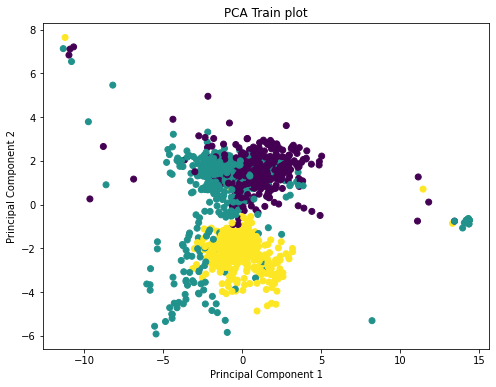

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(train_pca_df.values[:,0], train_pca_df.values[:,1], c = train_num_class)

plt.title("PCA Train plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#### Graficar componentes principales para dataset de validación

Text(0, 0.5, 'Principal Component 2')

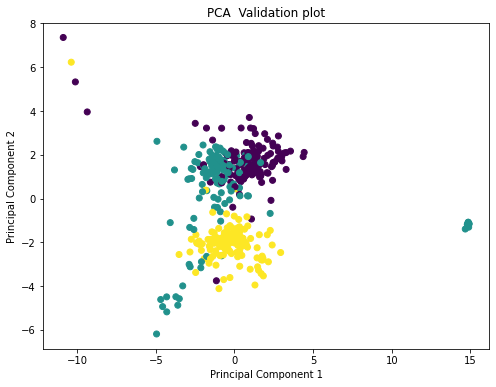

In [142]:
plt.figure(figsize=(8,6))
plt.scatter(val_pca_df.values[:,0], val_pca_df.values[:,1], c = val_num_class)

plt.title("PCA  Validation plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#### Graficar componentes principales para dataset de testeo

Text(0, 0.5, 'Principal Component 2')

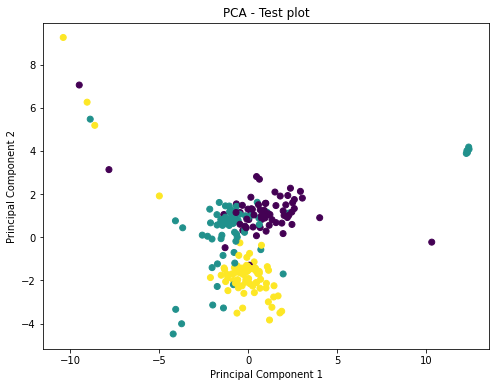

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(test_pca_df.values[:,0], test_pca_df.values[:,1], c = test_num_class)

plt.title("PCA - Test plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

**Análisis:** Se observa que en los 3 conjuntos de características: Entrenamiento, validación y testeo, se presenta una diferenciación adecuada entre las regiones de las diferentes clases, obviamente, con algunas excepciones. Esto es un buen indicio de que se pueden aplicar algoritmos de clasificación sobre estos datasets.

### Selección de características
Se comparan las diferentes características para ver si alguna de ellas, o alguna combinación de ellas, logra separar las clases de una manera más clara:

In [144]:
features

['y_centroid',
 'x_centroid',
 'perimeter',
 'area',
 'area_to_convex_ratio',
 'compacity',
 'area2_perimeter',
 'area2',
 'perimeter2',
 'mayor_menor',
 'menor_mayor',
 'area_perimeter_ratio',
 'extent',
 'min_row',
 'min_col',
 'max_row',
 'max_col',
 'max_min_col',
 'polygon_count',
 'perimeter_polygonCount']

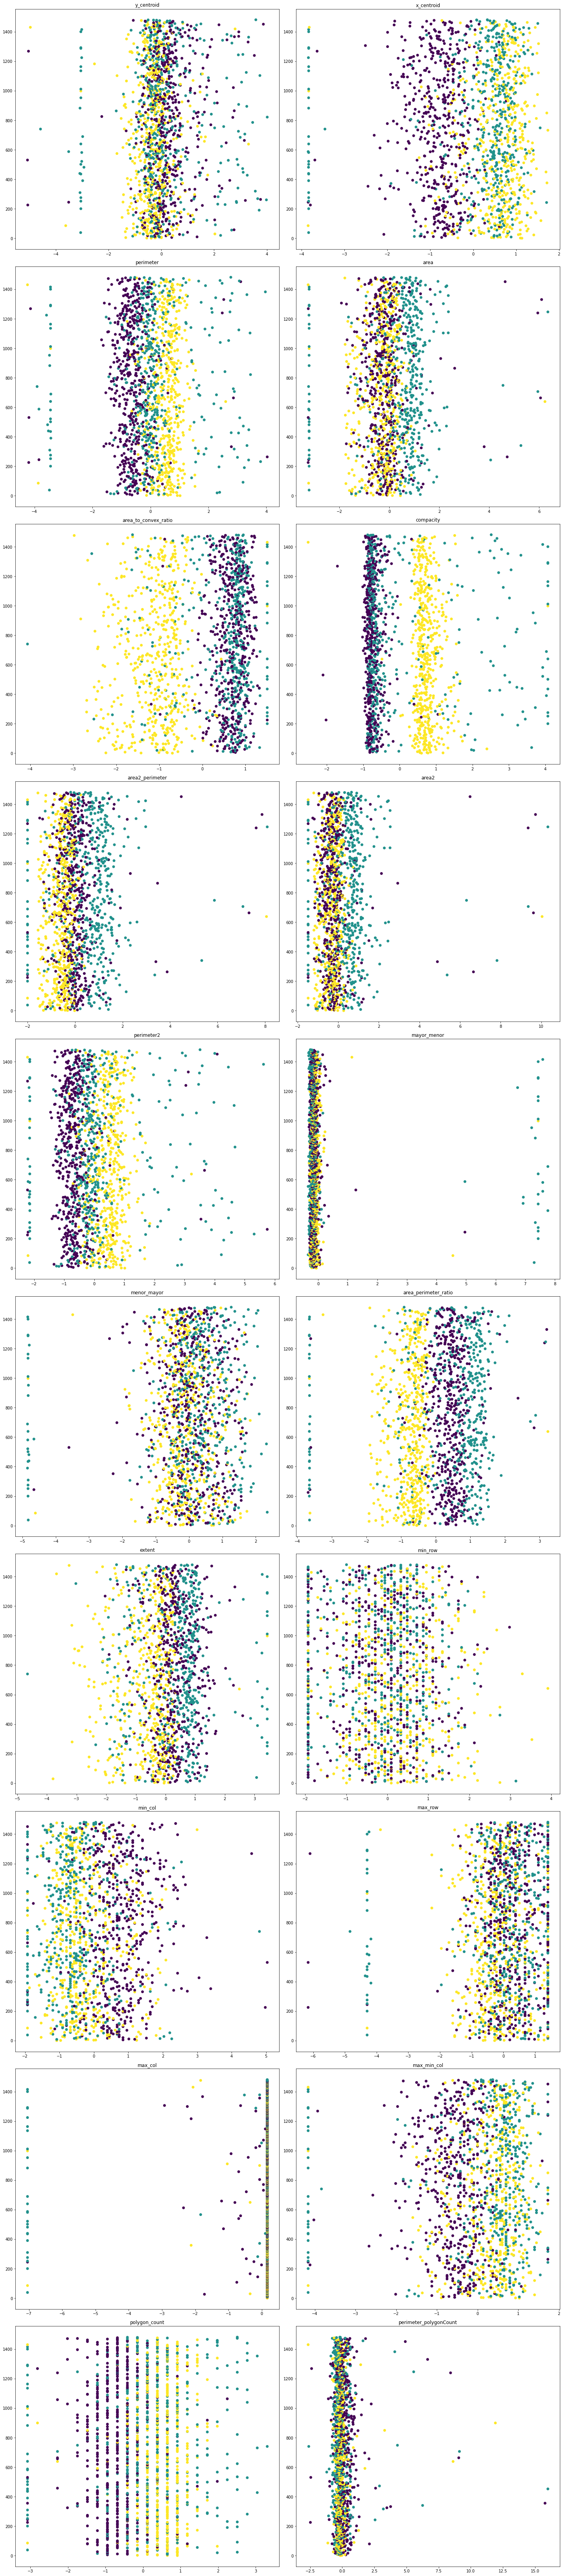

In [145]:
fig1 = plt.figure(1,figsize=(20, 100))
cols = 2
rows = (len(features)//2)+1

for i, feature in enumerate(features):
    fig1.add_subplot(rows, cols, i+1)
    plt.title(feature)
    plt.scatter(X_train[feature].values, np.arange(0, len(X_train)), c = train_num_class)

plt.tight_layout()

A partir de la dispersión en cada una de las características y mostrada en los gráficos anteriores, se decide trabajar con las características que se cree que generan una mejor separación de las clases. Estas características son:

In [193]:
sel_features = ['x_centroid', 'area_perimeter_ratio', 'compacity', 'min_col']

In [194]:
prueba_train = pd.DataFrame(X_train[sel_features])
prueba_train.head(5)

x_centroid  area_perimeter_ratio  compacity   min_col
0    1.136976             -0.295032   0.602838 -1.078497
1    1.102568             -0.548789   0.780211 -0.965309
2   -0.357012             -1.534175   1.193378  1.241865
3    0.478421             -0.542538   0.567540 -0.003208
4    0.427856             -0.945794   0.753518  0.053386

Observemos cómo sería la dispersión de las clases si se tomaran únicamente estas características. Nuevamente se utiliza el método PCA, únicamente sobre las características seleccionadas:

In [195]:
prueba_train_pca = PCA(n_components=2)
prueba_train_pca_result = prueba_train_pca.fit_transform(prueba_train)
prueba_train_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_train_pca_df['pca1'] = prueba_train_pca_result[:,0]
prueba_train_pca_df['pca2'] = prueba_train_pca_result[:,1]
varianza=(prueba_train_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_train_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [46.09841819 42.47741873]
Porcentaje total de los datos explicados por las componentes principales: 88.57583692127591
Porcentaje de información perdida: 11.424163078724092


pca1      pca2
0  0.146304 -1.677847
1  0.458583 -1.649411
2  2.056937  0.604635
3  0.595301 -0.518712
4  1.019967 -0.525458

Text(0, 0.5, 'area_perimeter_ratio')

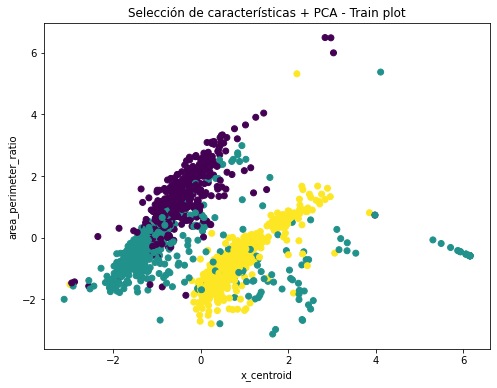

In [196]:
plt.figure(figsize=(8,6))
plt.scatter(prueba_train_pca_df['pca1'].values, prueba_train_pca_df['pca2'].values, c = train_num_class)

plt.title("Selección de características + PCA - Train plot")
plt.xlabel(prueba_train.columns[0])
plt.ylabel(prueba_train.columns[1])

De igual forma, se aplica esta selección de características sobre los datasets de validación y testeo, además de observar la dispersión de las clases usando el PCA nuevamente:

#### **Dataset de validación:**

In [197]:
prueba_val = pd.DataFrame(X_val[sel_features])
prueba_val.head(5)

x_centroid  area_perimeter_ratio  compacity   min_col
0    0.507923             -0.678199   0.561799 -0.013907
1    0.285415              1.058707  -0.893413 -0.013907
2    0.465491              0.153663  -0.179607 -0.714811
3    0.795831              1.196236  -0.601861 -1.123672
4    0.522032              1.241335  -0.804078 -0.597994

In [198]:
prueba_val_pca = PCA(n_components=2)
prueba_val_pca_result = prueba_val_pca.fit_transform(prueba_val)
prueba_val_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_val_pca_df['pca1'] = prueba_val_pca_result[:,0]
prueba_val_pca_df['pca2'] = prueba_val_pca_result[:,1]
varianza=(prueba_val_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_val_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [47.72801119 41.28428943]
Porcentaje total de los datos explicados por las componentes principales: 89.01230062512455
Porcentaje de información perdida: 10.987699374875447


pca1      pca2
0  0.770873 -0.390577
1 -1.404082 -0.137404
2 -0.255067 -0.797949
3 -1.299285 -1.335531
4 -1.464349 -0.745474

Text(0, 0.5, 'area_perimeter_ratio')

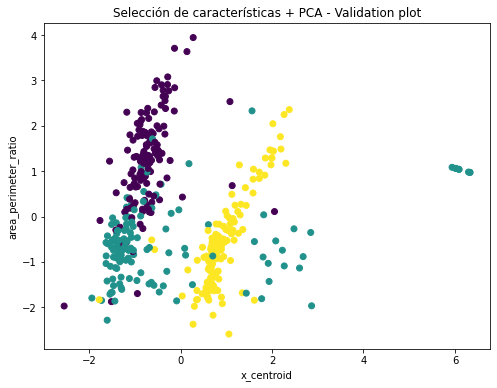

In [199]:
plt.figure(figsize=(8,6))
plt.scatter(prueba_val_pca_df['pca1'].values, prueba_val_pca_df['pca2'].values, c = val_num_class)

plt.title("Selección de características + PCA - Validation plot")
plt.xlabel(prueba_val.columns[0])
plt.ylabel(prueba_val.columns[1])

#### **Dataset de Testeo:**

In [200]:
prueba_test = pd.DataFrame(X_test[sel_features])
prueba_test.head(5)

x_centroid  area_perimeter_ratio  compacity   min_col
0    0.419680              1.101837  -0.862328 -0.292780
1    0.876866             -0.509930   0.678034 -0.731821
2   -0.533080              0.598923  -0.848866  0.640181
3    0.653047             -0.459724   0.689293 -0.018380
4   -0.156820              0.401495  -0.478921  0.804822

In [201]:
prueba_test_pca = PCA(n_components=2)
prueba_test_pca_result = prueba_test_pca.fit_transform(prueba_test)
prueba_test_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_test_pca_df['pca1'] = prueba_test_pca_result[:,0]
prueba_test_pca_df['pca2'] = prueba_test_pca_result[:,1]
varianza=(prueba_test_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_test_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [46.39229008 40.68358928]
Porcentaje total de los datos explicados por las componentes principales: 87.07587936554137
Porcentaje de información perdida: 12.924120634458632


pca1      pca2
0 -1.474562  0.092145
1  0.251639 -1.341838
2 -0.566290  1.188579
3  0.432253 -0.731538
4 -0.350995  0.907460

Text(0, 0.5, 'area_perimeter_ratio')

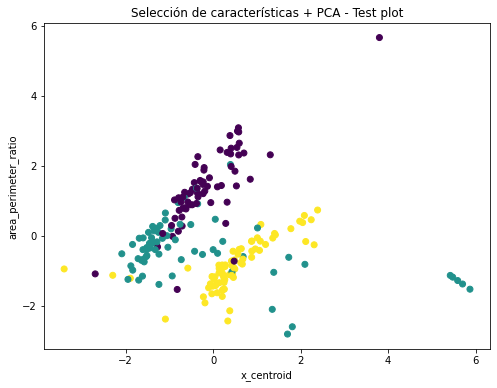

In [202]:
plt.figure(figsize=(8,6))
plt.scatter(prueba_test_pca_df['pca1'].values, prueba_test_pca_df['pca2'].values, c = test_num_class)

plt.title("Selección de características + PCA - Test plot")
plt.xlabel(prueba_test.columns[0])
plt.ylabel(prueba_test.columns[1])

**Análisis:** Se observa que con las características seleccionadas, se presenta una clara separación entre las diferentes clases, para cada uno de los datasets: Entrenamiento, Validación y Testeo.

## **8. Reconocimiento de patrones**
Una vez se tiene un conjunto de características refinado, se procede a entrenar modelos de clasificación para predecir nuevas entradas. En este caso, se toma como nuevas entradas al dataset de validación. Al final de cada modelo, se presenta la matriz de confusión y se muestran algunas de las predicciones realizadas sobre el dataset de validación. Cabe mencionar que los modelos se entrenan con las características seleccionadas, sin realizar el método del PCA, el cual se aplicó únicamente para fines de graficación y visualización.

Se importan algunas librerías para generar la matriz de confusión y métricas:

In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Función para mostrar algunas de las predicciones realizadas por el modelo sobre el dataset de validación:

In [204]:
def show_pred(preds, idxs):
    plt.figure(figsize=(30, 20))
    plt.suptitle("Predictions", fontsize=40)
    diff_s = math.sqrt(idxs[1] - idxs[0])
    for img_idx in range(idxs[0], idxs[1]):
        plt.subplot(diff_s, diff_s, img_idx + 1)
        plt.title(f"Pred: {preds[img_idx]}")
        plt.imshow(validationImages[img_idx], cmap="gray")
    plt.show()

### KNN

In [247]:
# Usando conjunto con caracteristicas aplanadas
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(prueba_train, Y_train)
acc = knn_model.score(prueba_val.values, Y_val.values.ravel())
print("Precisión del modelo KNN: {:.2f}%".format(acc * 100))

Precisión del modelo KNN: 97.14%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [206]:
pred_knn = knn_model.predict(prueba_val)

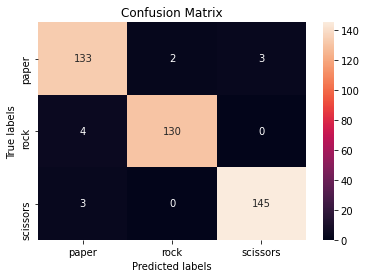

In [224]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), knn_model.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

<ipython-input-204-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


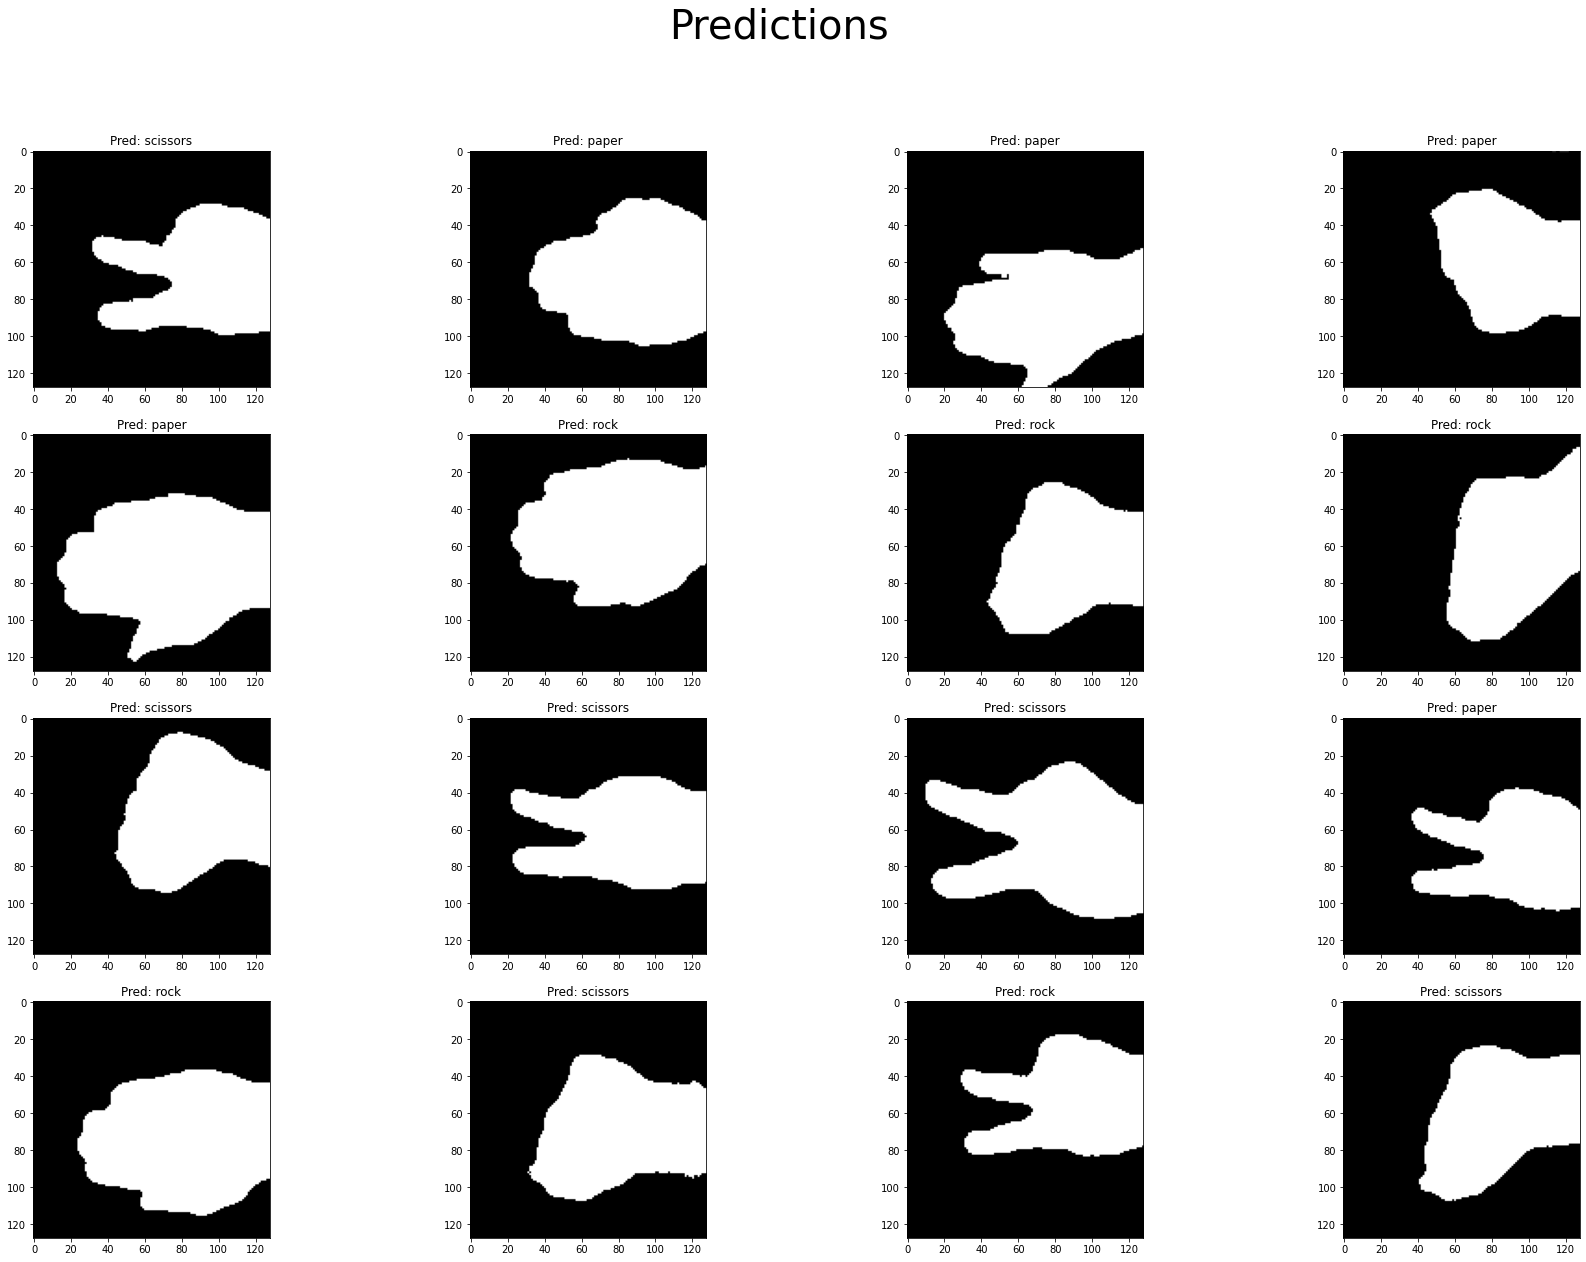

In [208]:
show_pred(pred_knn, (0, 16))

### Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier
# Creamos el arbol aleatorio
random_forest_model_0 = RandomForestClassifier(n_estimators = 210, random_state = SEED)
random_forest_model_0.fit(prueba_train, Y_train)

# Calculamos el score
acc = random_forest_model_0.score(prueba_val, Y_val)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

<ipython-input-209-8b5a0f563c01>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_0.fit(prueba_train, Y_train)


Precisión del modelo: 95.24%


In [210]:
pred_forest = random_forest_model_0.predict(prueba_val)

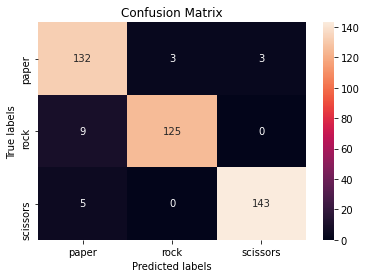

In [225]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), random_forest_model_0.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

<ipython-input-204-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


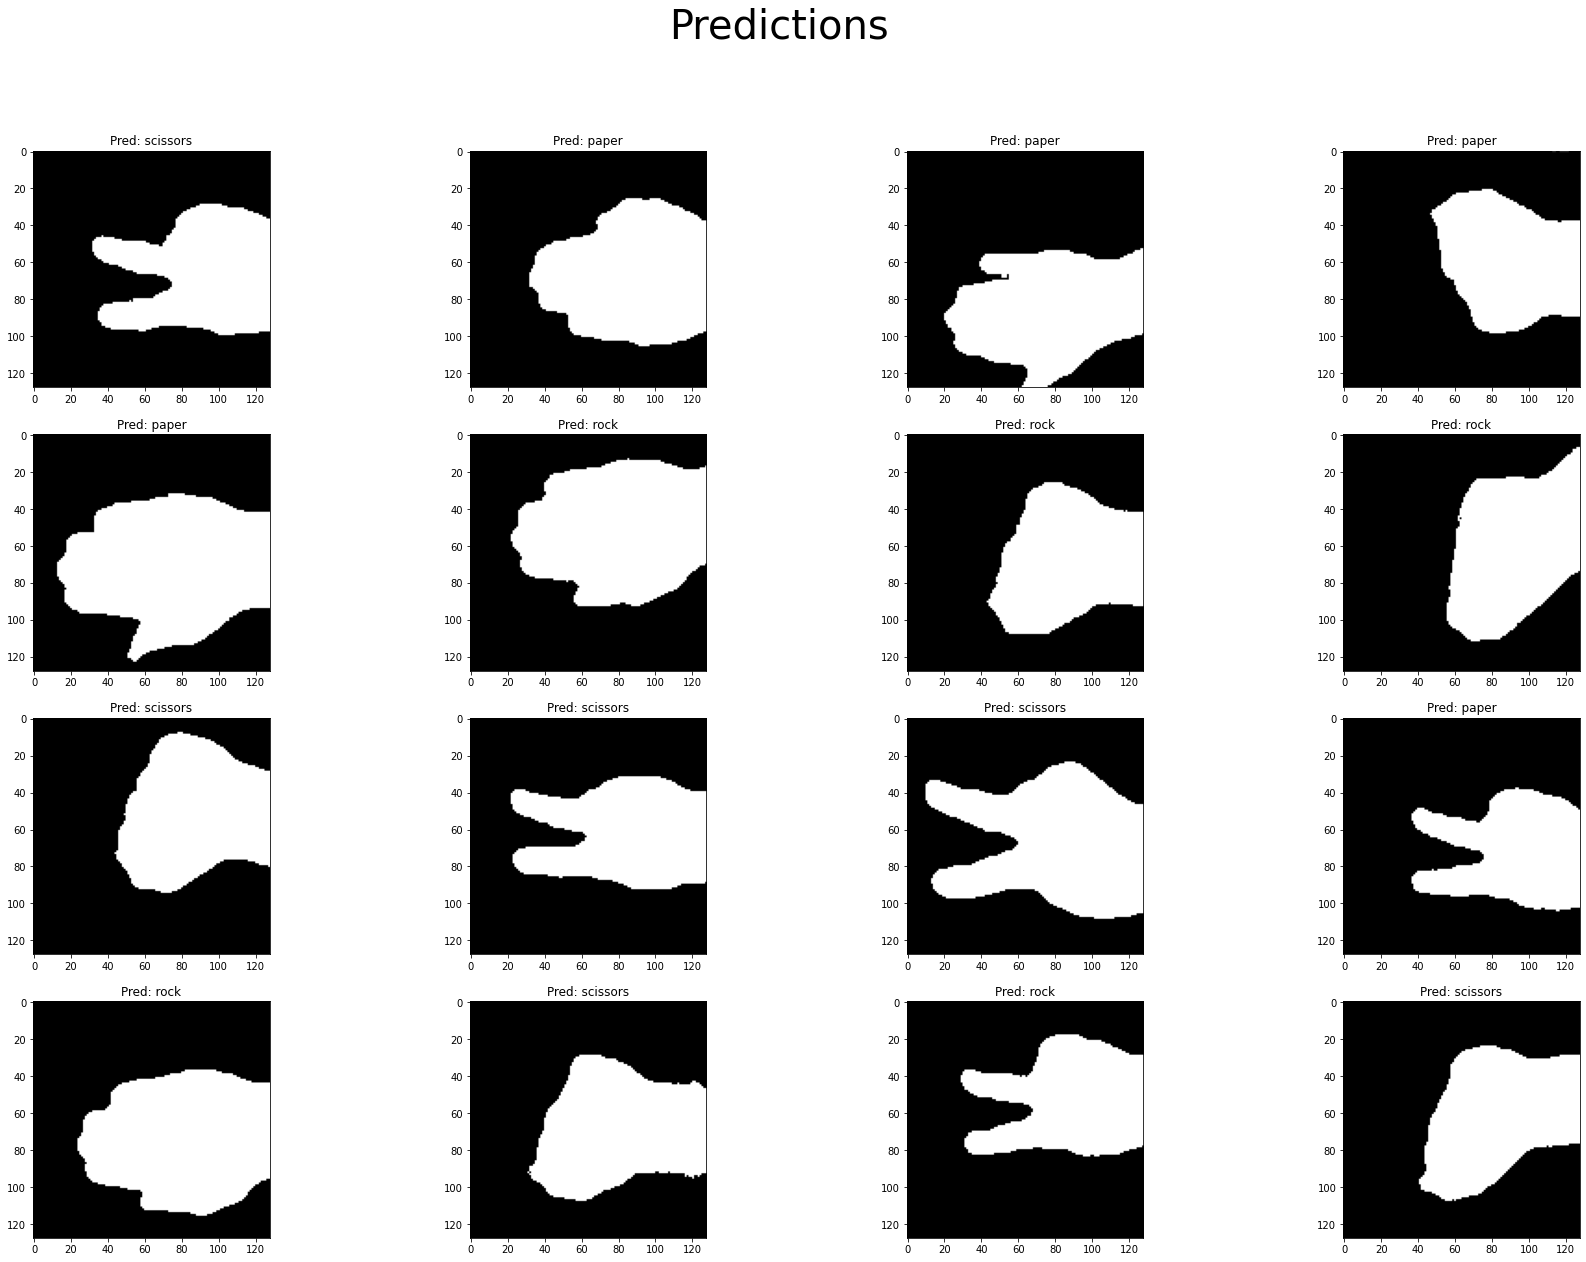

In [212]:
show_pred(pred_forest, (0, 16))

### SVC

In [213]:
from sklearn.svm import SVC
svc_model_0 = SVC()
svc_model_0.fit(prueba_train, Y_train)

# Calculamos el score
acc = svc_model_0.score(prueba_val, Y_val)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

Precisión del modelo: 97.62%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [214]:
pred_svc = svc_model_0.predict(prueba_val)

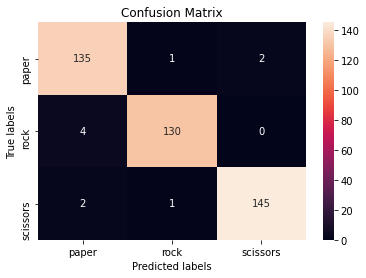

In [226]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), svc_model_0.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

<ipython-input-204-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


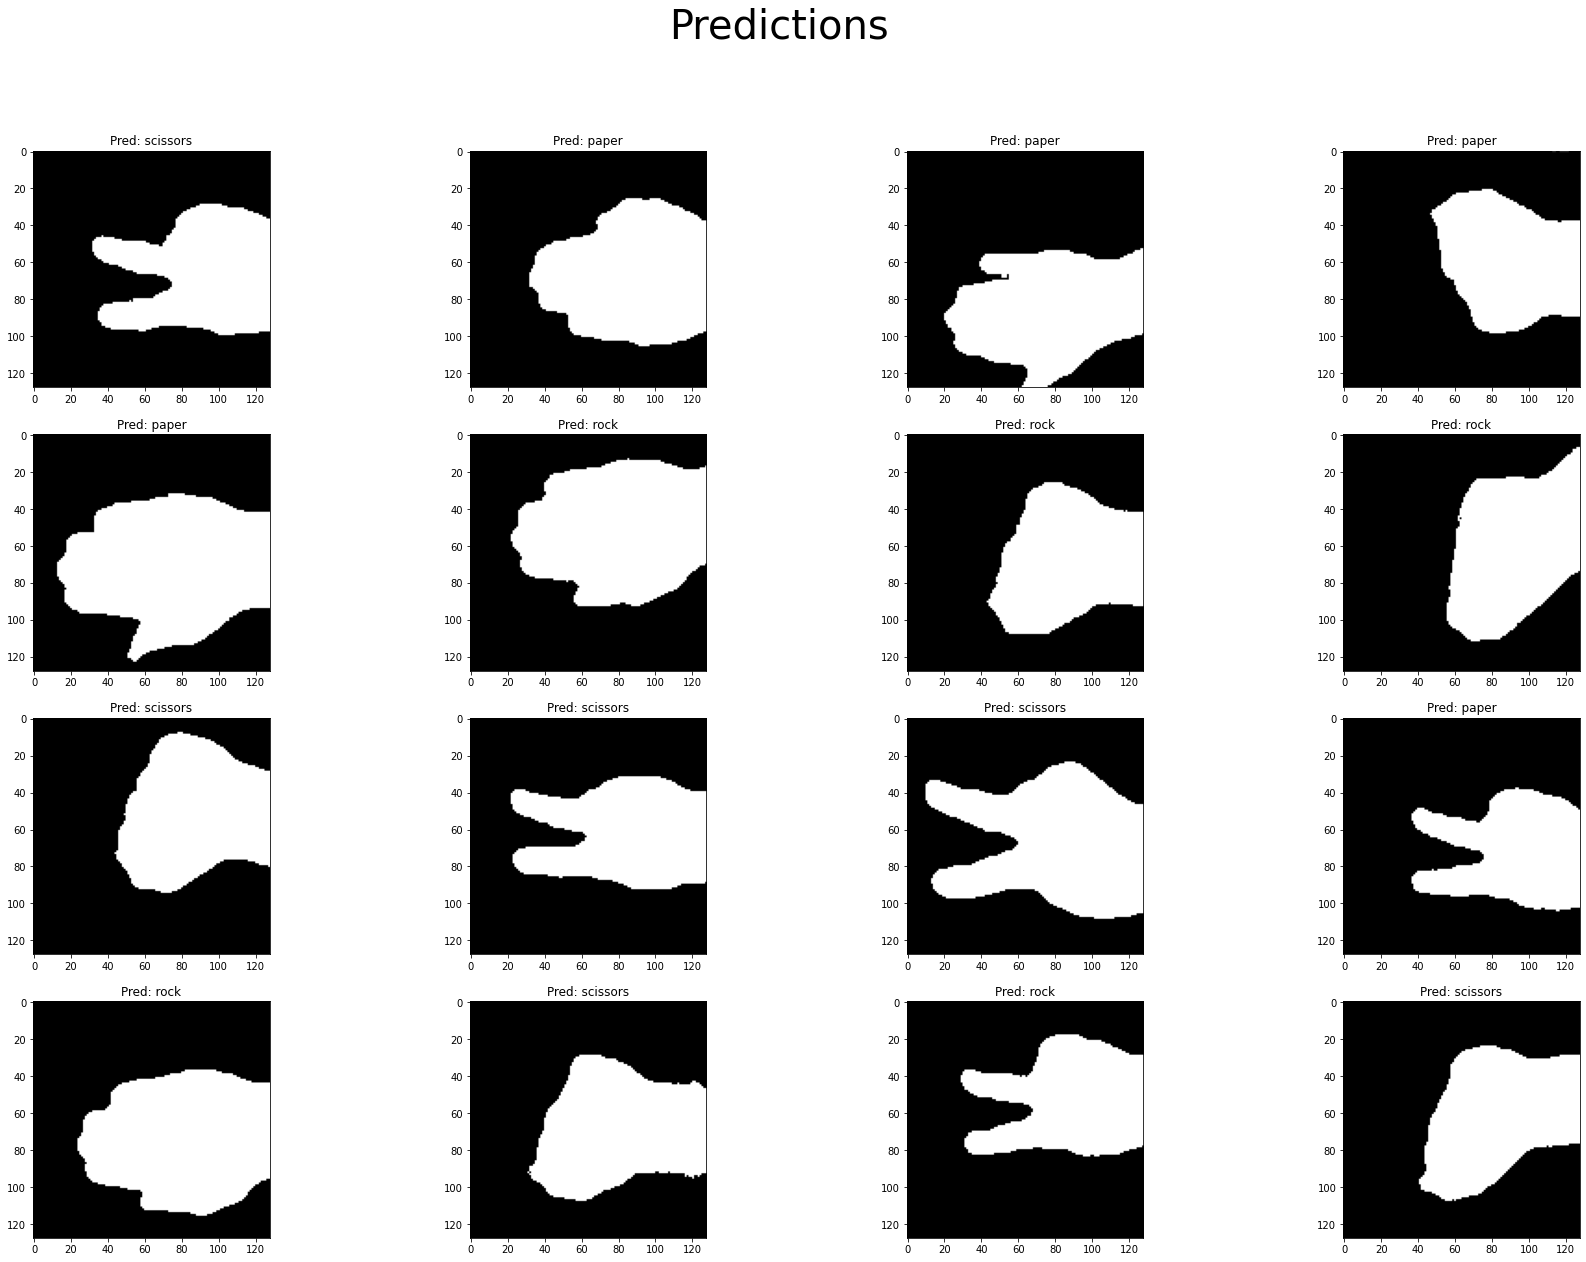

In [216]:
show_pred(pred_svc, (0, 16))

---

## HyperParameter Tunning

Se busca tunnear los hiperparámetros de los modelos realizados por medio de un algoritmo GridSearch. Una vez se conocen los mejores hiperparámetros, se evalúa la eficiencia del modelo usando el **dataset de testeo**. A continuación se muestran los resultados:

Readaptamos la función para mostrar predicciones sobre el **dataset de testeo:**

In [411]:
def show_pred(preds, idxs):
    plt.figure(figsize=(30, 20))
    plt.suptitle("Predictions", fontsize=40)
    diff_s = math.sqrt(idxs[1] - idxs[0])
    for img_idx in range(idxs[0], idxs[1]):
        plt.subplot(diff_s, diff_s, img_idx + 1)
        plt.title(f"Pred: {preds[img_idx]}")
        plt.imshow(testImages[img_idx], cmap="gray")
    plt.show()

## KNN

Instaciamos un nuevo modelo de KNN:

In [235]:
knn_model2 = KNeighborsClassifier(n_jobs=-1)

Llamar los hiperparámetros a tener en cuenta, con sus posibles valores:

In [264]:
# Number of neighbors to use
n_neighbors = [int(x) for x in np.linspace(start = 2, stop = 20, num=19)]
# Leaf size passed to BallTree or KDTree
leaf_size = [int(x) for x in np.linspace(start = 20, stop = 40, num=5)]
# Algorithm used to compute the nearest neighbors
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# Weight function used in prediction
weights = ['uniform', 'distance']

In [271]:
#Parameter Grid
param_grid = {'n_neighbors': n_neighbors,
              'leaf_size': leaf_size,
              'algorithm': algorithm,
              'weights': weights
             }
print(param_grid)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'leaf_size': [20, 25, 30, 35, 40], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}


Generar y entrenar modelo GridSearch:

In [272]:
from sklearn.model_selection import GridSearchCV
knn_Grid = GridSearchCV(estimator = knn_model2, param_grid=param_grid,cv=3,verbose=2, n_jobs=4)

In [273]:
knn_Grid.fit(prueba_train, Y_train)

Fitting 3 folds for each of 760 candidates, totalling 2280 fits


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=4,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [274]:
knn_Grid.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'uniform'}

Re-entrenar con los mejores hiperparámetros encontrados:

In [405]:
# Usando conjunto con caracteristicas aplanadas
knn_model2 = KNeighborsClassifier(algorithm ='auto', leaf_size=20, n_neighbors= 5, weights='uniform', n_jobs=-1)
knn_model2.fit(prueba_train, Y_train)
acc = knn_model2.score(prueba_test.values, Y_test.values.ravel())
print("Precisión del modelo KNN: {:.2f}%".format(acc * 100))

Precisión del modelo KNN: 91.98%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [406]:
pred_knn2 = knn_model2.predict(prueba_test)

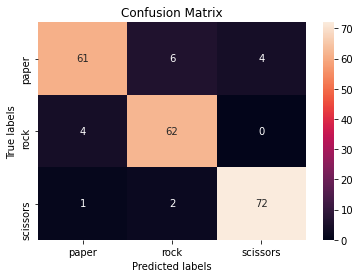

In [408]:
import seaborn as sns  
cm = confusion_matrix(Y_test.values.ravel(), knn_model2.predict(prueba_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

In [409]:
knn_acc = accuracy_score(Y_test.values.ravel(), pred_knn2)
knn_rec = recall_score(Y_test.values.ravel(), pred_knn2, average=None)
knn_pr = precision_score(Y_test.values.ravel(), pred_knn2, average=None)
knn_f1 = f1_score(Y_test.values.ravel(), pred_knn2, average=None)
print('KNN Model:')
print('Accuracy: ' + repr(knn_acc))
print('Recall: Paper: ' + repr(knn_rec[0]) + ', Rock: ' + repr(knn_rec[1]) + ', Scissors: ' + repr(knn_rec[2]))
print('Precision: Paper: ' + repr(knn_pr[0]) + ', Rock: ' + repr(knn_pr[1]) + ', Scissors: ' + repr(knn_rec[2]))
print('F1 Score: Paper: ' + repr(knn_f1[0]) + ', Rock: ' + repr(knn_f1[1]) + ', Scissors: ' + repr(knn_rec[2]))

KNN Model:
Accuracy: 0.9198113207547169
Recall: Paper: 0.8591549295774648, Rock: 0.9393939393939394, Scissors: 0.96
Precision: Paper: 0.9242424242424242, Rock: 0.8857142857142857, Scissors: 0.96
F1 Score: Paper: 0.8905109489051095, Rock: 0.9117647058823529, Scissors: 0.96


<ipython-input-411-7f6ddbb24639>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


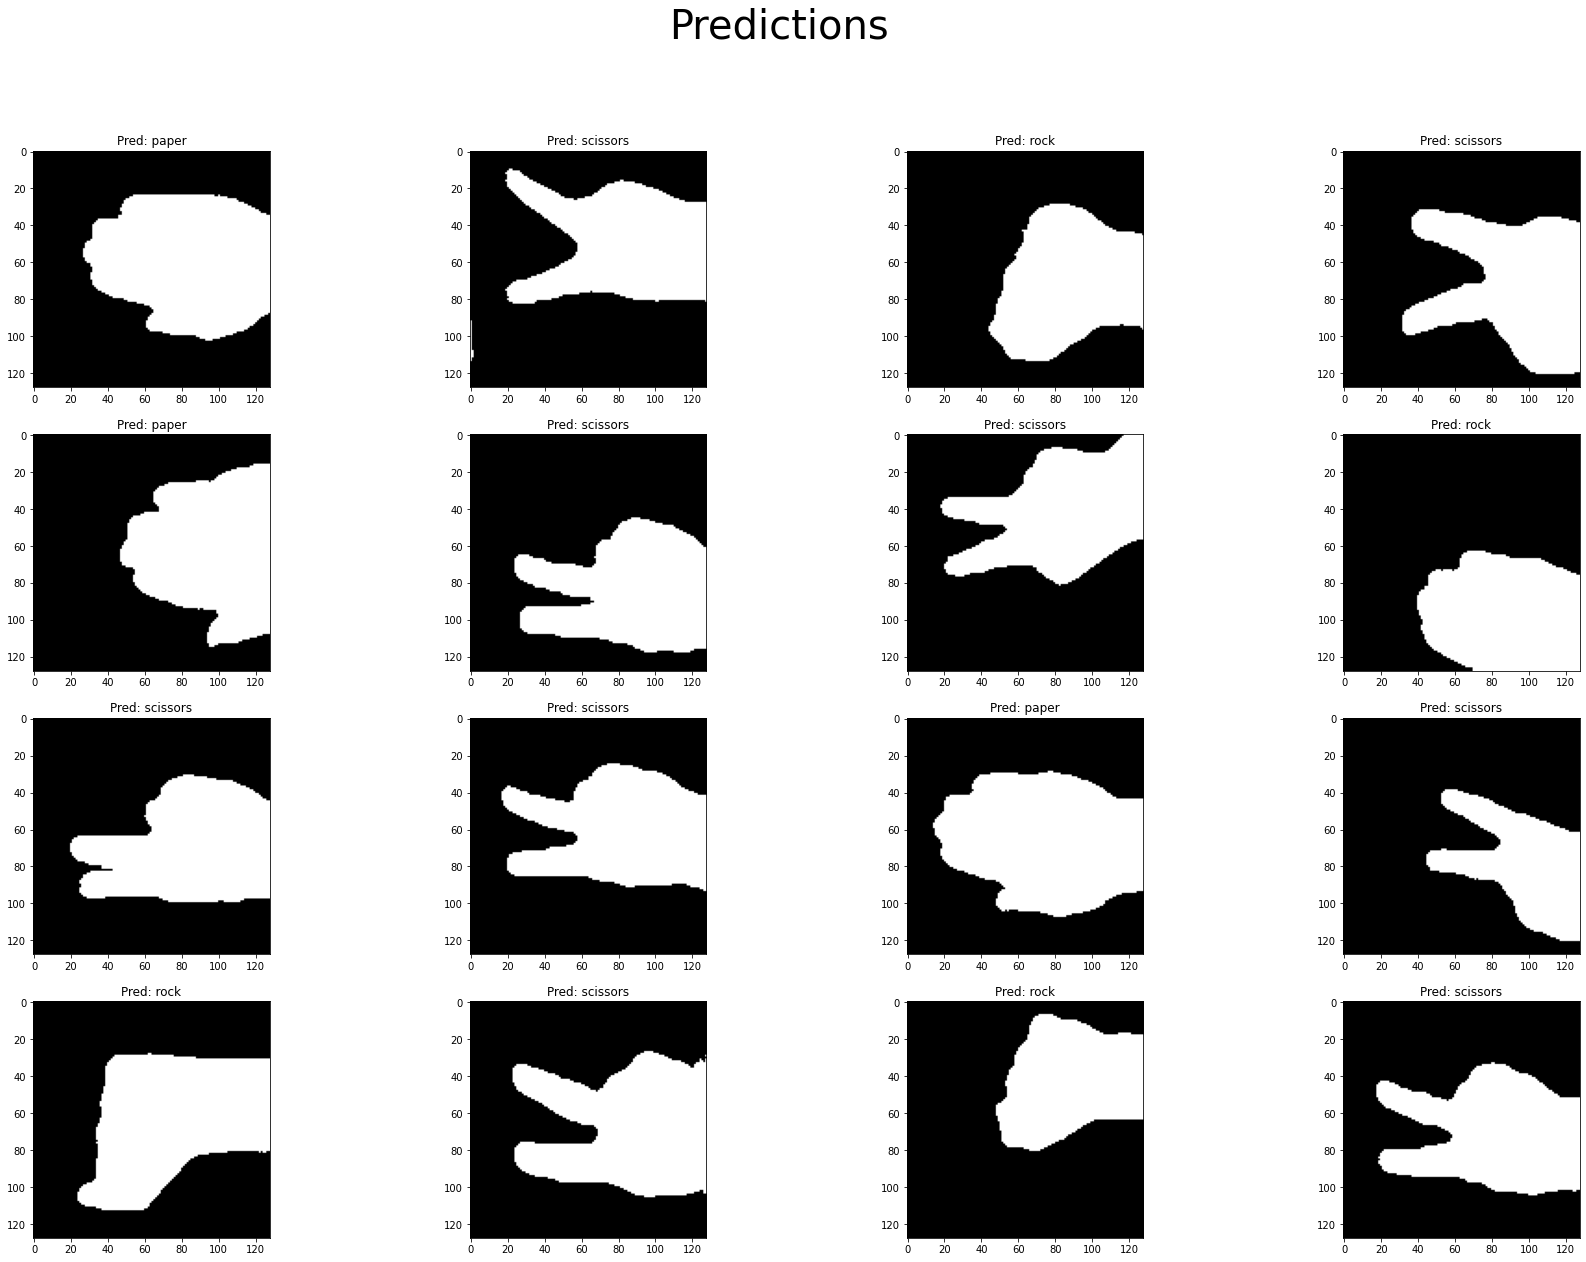

In [412]:
show_pred(pred_knn2, (0, 16))

## Random Forest

Instaciamos un nuevo modelo de RandomForest:

In [413]:
random_forest_model_1 = RandomForestClassifier()

Llamar los hiperparámetros a tener en cuenta, con sus posibles valores:

In [337]:
# Numero de arboles en el random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num=30)]

In [338]:
#Parameter Grid
param_grid = {'n_estimators': n_estimators,
             }
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]}


Generar y entrenar modelo GridSearch:

In [339]:
rf_Grid = GridSearchCV(estimator = random_forest_model_1, param_grid=param_grid,cv=3,verbose=2, n_jobs=4)

In [340]:
rf_Grid.fit(prueba_train, Y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=80), n_jobs=4,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300]},
             verbose=2)

In [341]:
rf_Grid.best_params_

{'n_estimators': 130}

Re-entrenar con los mejores hiperparámetros encontrados:

In [414]:
from sklearn.ensemble import RandomForestClassifier
# Creamos el arbol aleatorio
random_forest_model_1 = RandomForestClassifier(n_estimators = 130, random_state = SEED)
random_forest_model_1.fit(prueba_train, Y_train)

# Calculamos el score
acc = random_forest_model_1.score(prueba_test, Y_test)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

<ipython-input-414-19e97ee26eea>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_1.fit(prueba_train, Y_train)


Precisión del modelo: 91.04%


In [415]:
pred_rf2 = random_forest_model_1.predict(prueba_test)

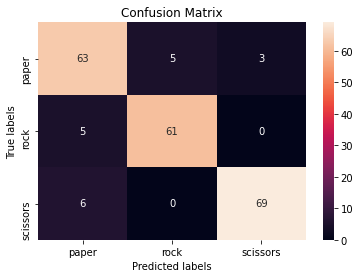

In [417]:
import seaborn as sns  
cm = confusion_matrix(Y_test.values.ravel(), random_forest_model_1.predict(prueba_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

In [418]:
rf_acc = accuracy_score(Y_test.values.ravel(), pred_rf2)
rf_rec = recall_score(Y_test.values.ravel(), pred_rf2, average=None)
rf_pr = precision_score(Y_test.values.ravel(), pred_rf2, average=None)
rf_f1 = f1_score(Y_test.values.ravel(), pred_rf2, average=None)
print('RandomForest Model:')
print('Accuracy: ' + repr(rf_acc))
print('Recall: Paper: ' + repr(rf_rec[0]) + ', Rock: ' + repr(rf_rec[1]) + ', Scissors: ' + repr(rf_rec[2]))
print('Precision: Paper: ' + repr(rf_pr[0]) + ', Rock: ' + repr(rf_pr[1]) + ', Scissors: ' + repr(rf_rec[2]))
print('F1 Score: Paper: ' + repr(rf_f1[0]) + ', Rock: ' + repr(rf_f1[1]) + ', Scissors: ' + repr(rf_rec[2]))

RandomForest Model:
Accuracy: 0.910377358490566
Recall: Paper: 0.8873239436619719, Rock: 0.9242424242424242, Scissors: 0.92
Precision: Paper: 0.8513513513513513, Rock: 0.9242424242424242, Scissors: 0.92
F1 Score: Paper: 0.8689655172413793, Rock: 0.9242424242424242, Scissors: 0.92


<ipython-input-411-7f6ddbb24639>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


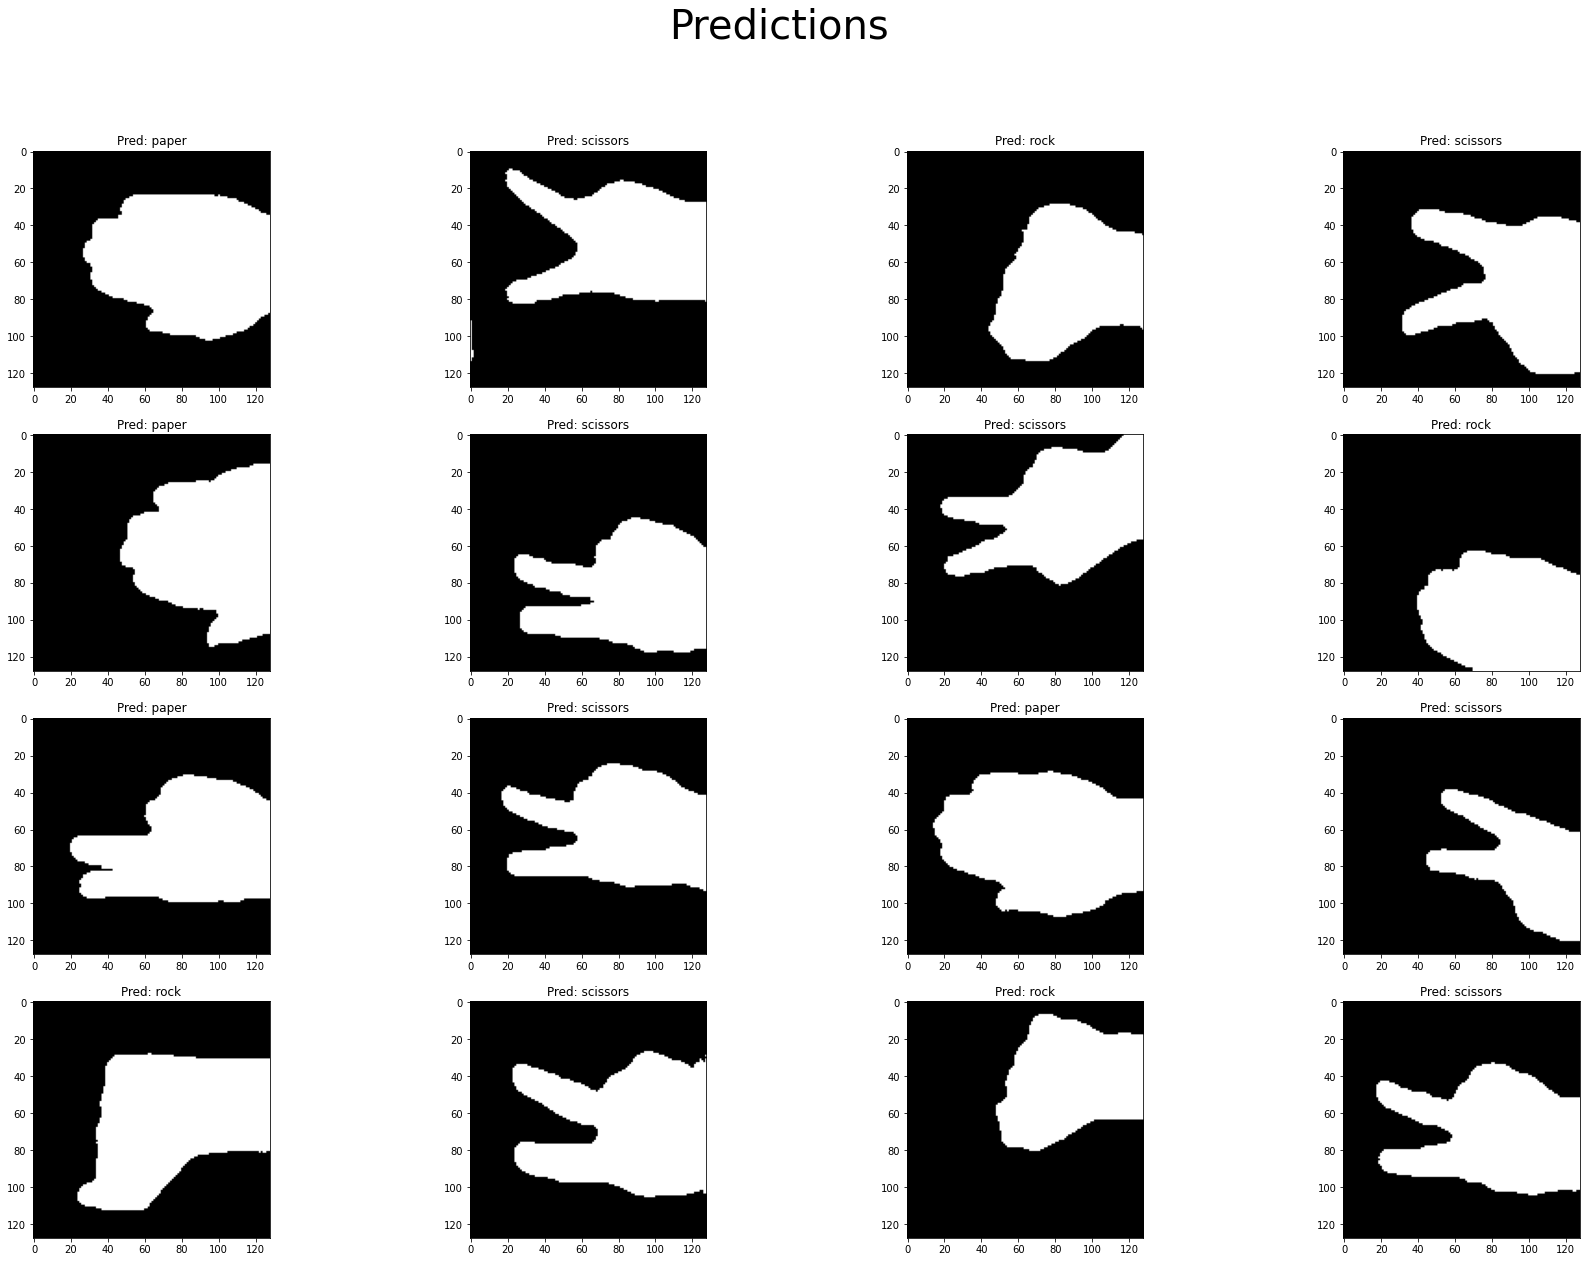

In [419]:
show_pred(pred_rf2, (0, 16))

## SVC

Instaciamos un nuevo modelo de SVC:

In [361]:
svc_model_1= SVC()

Llamar los hiperparámetros a tener en cuenta, con sus posibles valores:

In [372]:
# Regularization parameter
C = [1, 5, 10, 20, 40, 50, 100, 1000]
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
gamma = ['scale', 'auto']

In [373]:
#Parameter Grid
param_grid = {'C': C,
              'gamma': gamma,
              }
print(param_grid)

{'C': [1, 5, 10, 20, 40, 50, 100, 1000], 'gamma': ['scale', 'auto']}


Generar y entrenar modelo GridSearch:

In [374]:
svc_Grid = GridSearchCV(estimator = svc_model_1, param_grid=param_grid,cv=3,verbose=2, n_jobs=4)

In [375]:
svc_Grid.fit(prueba_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 20, 40, 50, 100, 1000],
                         'gamma': ['scale', 'auto']},
             verbose=2)

In [385]:
svc_Grid.best_params_

{'C': 100, 'gamma': 'scale'}

Re-entrenar con los mejores hiperparámetros encontrados:

In [420]:
from sklearn.svm import SVC
svc_model_1 = SVC(C=1, gamma='scale')
svc_model_1.fit(prueba_train, Y_train)

# Calculamos el score
acc = svc_model_1.score(prueba_test, Y_test)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

Precisión del modelo: 92.92%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [421]:
pred_svc2 = svc_model_1.predict(prueba_test)

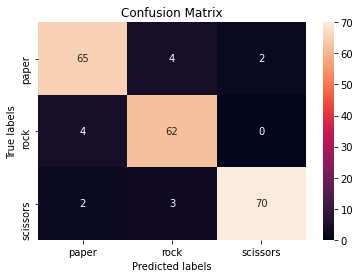

In [422]:
import seaborn as sns  
cm = confusion_matrix(Y_test.values.ravel(), svc_model_1.predict(prueba_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

In [423]:
svc_acc = accuracy_score(Y_test.values.ravel(), pred_svc2)
svc_rec = recall_score(Y_test.values.ravel(), pred_svc2, average=None)
svc_pr = precision_score(Y_test.values.ravel(), pred_svc2, average=None)
svc_f1 = f1_score(Y_test.values.ravel(), pred_svc2, average=None)
print('SVC Model:')
print('Accuracy: ' + repr(svc_acc))
print('Recall: Paper: ' + repr(svc_rec[0]) + ', Rock: ' + repr(svc_rec[1]) + ', Scissors: ' + repr(svc_rec[2]))
print('Precision: Paper: ' + repr(svc_pr[0]) + ', Rock: ' + repr(svc_pr[1]) + ', Scissors: ' + repr(svc_rec[2]))
print('F1 Score: Paper: ' + repr(svc_f1[0]) + ', Rock: ' + repr(svc_f1[1]) + ', Scissors: ' + repr(svc_rec[2]))

SVC Model:
Accuracy: 0.9292452830188679
Recall: Paper: 0.9154929577464789, Rock: 0.9393939393939394, Scissors: 0.9333333333333333
Precision: Paper: 0.9154929577464789, Rock: 0.8985507246376812, Scissors: 0.9333333333333333
F1 Score: Paper: 0.9154929577464789, Rock: 0.9185185185185185, Scissors: 0.9333333333333333


<ipython-input-411-7f6ddbb24639>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


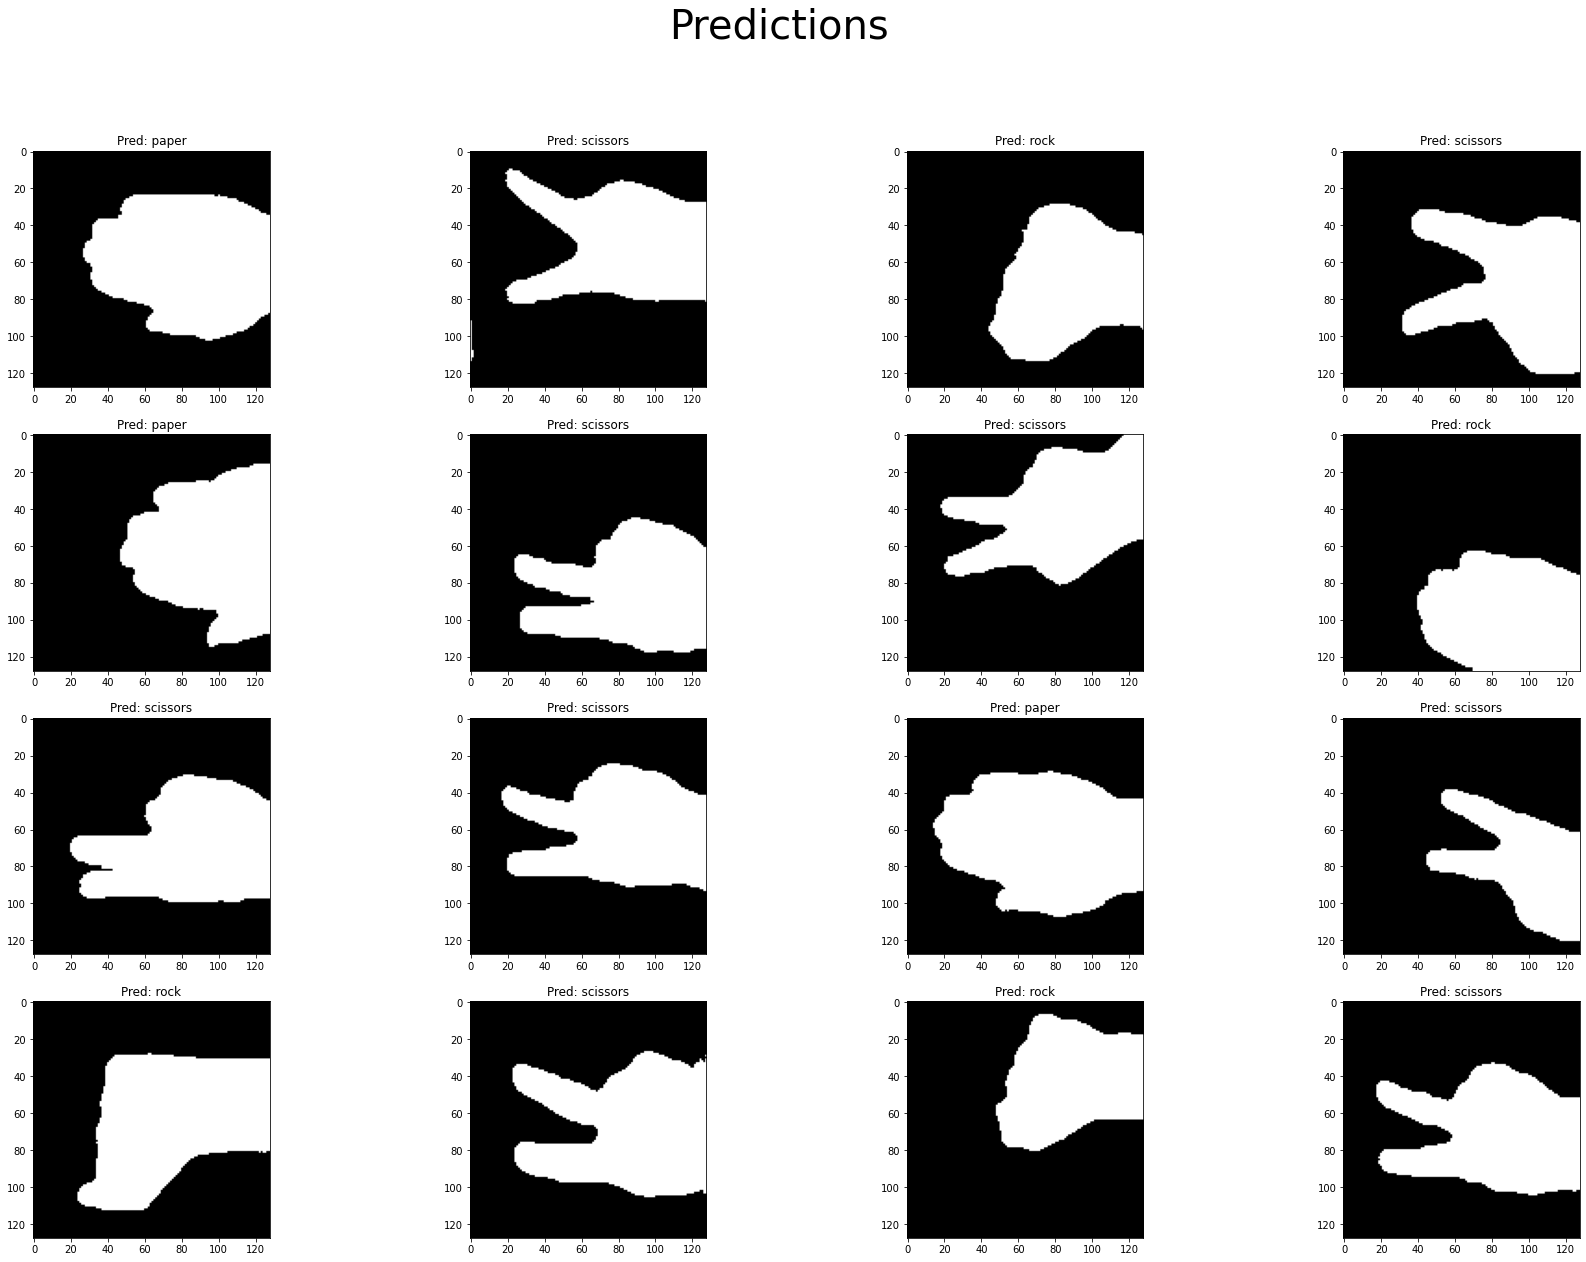

In [424]:
show_pred(pred_svc2, (0, 16))

## **9. Análisis de resultados**
En esta sección se resumen los resultados obtenidos por todos los modelos de Aprendizaje de máquinas y se selecciona el modelo que presente mejores resultados según los requisitos del problema.

En la siguiente gráfica se resumen los resultados obtenidos por cada uno de los métodos implementados y para cada una de las clases: 'Paper', 'Rock', 'Scissors:

In [425]:
knn_paper = [knn_acc, knn_rec[0], knn_pr[0], knn_f1[0]]
rf_paper = [rf_acc, rf_rec[0], rf_pr[0], rf_f1[0]]
svc_paper = [svc_acc, svc_rec[0], svc_pr[0], svc_f1[0]]

In [426]:
knn_rock = [knn_acc, knn_rec[1], knn_pr[1], knn_f1[1]]
rf_rock = [rf_acc, rf_rec[1], rf_pr[1], rf_f1[1]]
svc_rock = [svc_acc, svc_rec[1], svc_pr[1], svc_f1[1]]

In [427]:
knn_scissors = [knn_acc, knn_rec[2], knn_pr[2], knn_f1[2]]
rf_scissors = [rf_acc, rf_rec[2], rf_pr[2], rf_f1[2]]
svc_scissors = [svc_acc, svc_rec[2], svc_pr[2], svc_f1[2]]

In [428]:
knn_res = [knn_paper, knn_rock, knn_scissors]
rf_res = [rf_paper, rf_rock, rf_scissors]
svc_res = [svc_paper, svc_rock, svc_scissors]

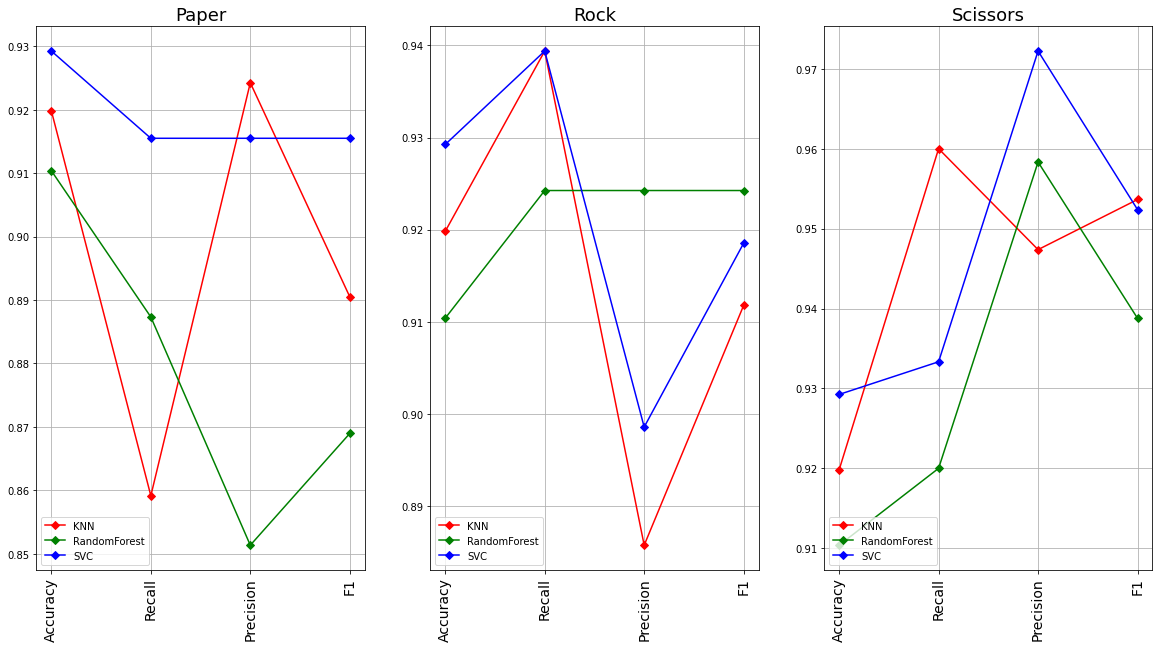

In [429]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3,figsize=(20,10))
x = np.arange(0.5, 1, 0.125)
x_ticks_labels = ['Accuracy','Recall','Precision','F1']
titles = ['Paper', 'Rock', 'Scissors']
for n in range(3):
    y = knn_res[n]
    y2 = rf_res[n]
    y3 = svc_res[n]
    ax[n].set_xticks(x)
    ax[n].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=14)
    ax[n].set_title(titles[n], fontsize=18)
    ax[n].plot(x, y, '-rD', label = 'KNN')
    ax[n].plot(x, y2, '-gD', label = 'RandomForest')
    ax[n].plot(x, y3, '-bD', label = 'SVC')
    ax[n].grid(True)
    ax[n].legend(loc="lower left")

**Análisis:** Como puede observarse, el algoritmo SVC fue el que mejores métricas presentó, en general, para todas las clases presentes, seguido por el algoritmo KNN y finalmente, por el algoritmo RandomForest.

Por lo tanto, si se necesitara de una selección única de un modelo para este problema, la más adecuada sería el **Support Vector Classifier - SVC**

## **10. Conclusiones**

* Resúmen de las etapas del proceso de Visión Artificial:

    **1. Adquisición:** Se obtuvo el dataset original y se exploraron todas sus características. Se generaron los subsets de entrenamiento, validación y testeo.
    
    **2. Preprocesamiento:** Se aplicó un reshape a todas las imágenes, un filtro de medianBlur y se extrajo el canal H del espacio HSV.
    
    **3. Segmentación:** Se utilizó la técnica OTSU para segmentar cada una de las imágenes.
    
    **4. Extracción de características:** Se obtuvieron características de forma, relacionadas con el perímetro, el área, longitudes de ejes, centroides, etc.
    
    **5. Selección de características:** Se realizaron pruebas iterativas que permitieron encontrar la combinación de características que alcazaban una mejor clasificación de las imágenes.
    
    **6. Reconocimiento de patrones:** Se entrenaron 3 modelos de Aprendizaje de máquinas con las características seleccionadas, se tunnearon los hiperparámetros y se obtuvieron métricas sobre el dataset de testeo.


* En esta implementación se evidenció notablemente la importancia de la primera etapa de un proceso de visión artificial, la captura de la imagen, pues inicialmente se trabajó con un conjunto de datos bastante heterogéneo, con imágenes que provenían de diferentes fuentes y fueron capturadas en diferentes ambientes no controlados, lo que finalmente llevó a que se buscara un conjunto de imágenes más homogéneo como el trabajado en este notebook.

* Se realizaron todas las etapas de un proceso de Visión Artificial, comenzando por la adquisición, pasando por el preprocesamiento, la segmentación, la extracción y selección de características y el reconocimiento de patrones. Para cada una de las etapas, se tomó una imagen en específico para decidir el procedimiento a realizar sobre la totalidad de los datasets de entrenamiento, validación y testeo.
    
* Se utilizó el método de reducción de características 'Principal Component Analysis - PCA' con el fin de visualizar gráficamente la dispersión de los datos, teniendo en cuenta las clases que se presentan en el dataset: Paper, Rock, Scissors.

* Según las métricas obtenidas y según el gráfico generado, se concluye que el modelo **Support Vector Classifier - SVC** es el más adecuado para realizar la clasificación de las características de las imágenes del dataset contemplado en este notebook. 

* Por medio de este trabajo fue posible poner en práctica los conocimientos adquiridos en la materia y evidenciar la importancia de cada uno de los pasos, para llevar a buen término un proyecto de Visión por computador, complementado con la investigación de cada una de las técnicas, sus hiperparámetros y procedimientos.